<a href="https://colab.research.google.com/github/JaimeLopezGarrido/Trabajos_Labo1/blob/main/src/workflows/Gerencial_Final_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WorkFlow Diego Farfán (REV_010)





### 9.5 Conexion con drive

In [2]:
# primero establecer el Runtime de Python 3
from google.colab import drive
drive.mount('/content/.drive')

Mounted at /content/.drive


In [3]:
%%shell

mkdir -p "/content/.drive/My Drive/labo1"
mkdir -p "/content/buckets"
ln -s "/content/.drive/My Drive/labo1" /content/buckets/b1

mkdir -p ~/.kaggle
cp /content/buckets/b1/kaggle/kaggle.json  ~/.kaggle
chmod 600 ~/.kaggle/kaggle.json


mkdir -p /content/buckets/b1/exp
mkdir -p /content/buckets/b1/datasets
mkdir -p /content/datasets


webfiles="https://storage.googleapis.com/open-courses/austral2025-af91/"
destino_local="/content/datasets"
destino_bucket="/content/buckets/b1/datasets"


archivo="dataset_pequeno.csv"

if ! test -f $destino_bucket/$archivo; then
  wget  $webfiles/$archivo  -O $destino_bucket/$archivo
fi


if ! test -f $destino_local/$pequeno; then
  cp  $destino_bucket/$archivo  $destino_local/$archivo
fi

#-------

archivo="gerencial_competencia_2025.csv.gz"

if ! test -f $destino_bucket/$archivo; then
  wget  $webfiles/$archivo  -O $destino_bucket/$archivo
fi


if ! test -f $destino_local/$pequeno; then
  cp  $destino_bucket/$archivo  $destino_local/$archivo
fi

## 9.7  Workflow

## Inicializacion

Esta parte se debe correr con el runtime en lenguaje **R** Ir al menu, Runtime -> Change Runtime Type -> Runtime type -> R

In [1]:
#Registro de timestamp del inicio de la versión final
format(Sys.time(), "%a %b %d %X %Y")

[1] "Sun Nov 30 07:48:19 PM 2025"

In [2]:
# Limpieza de la memoria del entorno actual
rm(list=ls(all.names=TRUE)) # remove all objects
gc(full=TRUE, verbose=FALSE) # garbage collection

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,660358,35.3,1454505,77.7,1454505,77.7
Vcells,1226545,9.4,8388608,64.0,1975136,15.1


In [3]:
## Carga de paquetes necesarios
require("data.table")

if( !require("R.utils")) install.packages("R.utils")
require("R.utils")

Loading required package: data.table

Loading required package: R.utils

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘R.utils’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.utils

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.27.1 (2025-05-02 21:00:05 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.13.0 (2025-02-24 21:20:02 UTC) successfully loaded. See ?R.utils for help.






#### Lista de Parámetros globales de la versión final del código


In [4]:
PARAM <- list()
PARAM$semilla_primigenia <- 304879

PARAM$experimento <- 304879-01
PARAM$dataset <- "gerencial_competencia_2025.csv.gz"

#### Carpeta de la versión final del código

In [5]:
# Defino carpeta de trabajo del experimento

setwd("/content/buckets/b1/exp")
experimento_folder <- paste0("WF", PARAM$experimento)
dir.create(experimento_folder, showWarnings=FALSE)
setwd( paste0("/content/buckets/b1/exp/", experimento_folder ))

### 9.7.1   Preprocesamiento del dataset

#### 9.7.1.1  DT dataset gerencial

In [6]:
# Lectura del dataset
dataset <- fread(paste0("/content/datasets/", PARAM$dataset))

#### 9.7.1.2  CA  Catastrophe Analysis
Técnica no empleada en el presente código

In [7]:
# Diagnóstico de meses rotos (todas las columnas)
meses <- unique(dataset$foto_mes)

for (mes in meses) {
  cat("\n### Mes:", mes, "\n")
  tmp <- dataset[foto_mes == mes]

  # porcentaje de ceros por columna
  pceros <- tmp[, lapply(.SD, function(x) mean(x == 0, na.rm = TRUE))]
  rotas <- names(pceros)[pceros >= 0.95]   # más del 95% ceros

  if (length(rotas) > 0) {
    print(rotas)
  } else {
    cat("Sin columnas rotas.\n")
  }
}



### Mes: 202005 
[1] "Master_status" "Visa_status"  

### Mes: 202006 
 [1] "internet"                    "mrentabilidad"              
 [3] "mrentabilidad_annual"        "mcomisiones"                
 [5] "mactivos_margen"             "mpasivos_margen"            
 [7] "mcuentas_saldo"              "ctarjeta_visa_transacciones"
 [9] "mtarjeta_visa_consumo"       "mtarjeta_master_consumo"    
[11] "ccallcenter_transacciones"   "chomebanking_transacciones" 
[13] "Master_status"               "Visa_status"                

### Mes: 202007 
[1] "Master_status" "Visa_status"  

### Mes: 202008 
[1] "Master_status" "Visa_status"  

### Mes: 202009 
[1] "Master_status" "Visa_status"  

### Mes: 202010 
[1] "internet"      "Master_status" "Visa_status"  

### Mes: 202011 
[1] "internet"      "Master_status" "Visa_status"  

### Mes: 202012 
[1] "internet"      "Master_status" "Visa_status"  

### Mes: 202101 
[1] "internet"      "Master_status" "Visa_status"  

### Mes: 202102 
[1] "internet

In [8]:
# -----------------------------------------------
# Catastrophe Analysis: reparación del mes 202006
# -----------------------------------------------

cols_rotas_202006 <- c(
  "mrentabilidad", "mrentabilidad_annual", "mcomisiones", "mactivos_margen",
  "mpasivos_margen", "mcuentas_saldo", "ctarjeta_visa_transacciones",
  "mtarjeta_visa_consumo", "mtarjeta_master_consumo",
  "chomebanking_transacciones"
)

for (col in cols_rotas_202006) {
  dataset[foto_mes == 202006 & get(col) == 0, (col) := NA]
}

cat(">>> Mes 202006 reparado con Catastrophe Analysis <<<\n")


>>> Mes 202006 reparado con Catastrophe Analysis <<<


#### 9.7.1.3  DR  Data Drifting
En este paso se corrige el data drifting de las variables monetarias mediante índices financieros históricos.
Se adapta el ***módulo de drifting del Analista Senior*** al dataset gerencial, ajustando los meses disponibles e incorporando los vectores de **IPC, dólar blue, dólar oficial y UVA para el período 202005–202109.**
Esto evita que el modelo aprenda efectos de inflación o devaluación en lugar del comportamiento real del cliente.

In [9]:
# Objetivo:
#   Corregir el data drifting de las variables monetarias (inflación,
#   variación del tipo de cambio, actualización de UVA, etc.), de modo
#   que los montos sean comparables entre meses.
#
# Estrategia:
#   A) Definir una tabla de índices financieros históricos (tb_indices),
#      para el rango de foto_mes presente en el dataset gerencial
#      (202005–202109).
#   B) Implementar varios métodos de corrección (drift_*):
#        - drift_deflacion     -> usa IPC
#        - drift_dolar_blue    -> usa dólar blue
#        - drift_dolar_oficial -> usa dólar oficial
#        - drift_UVA           -> usa UVA
#        - drift_rank_simple   -> rankeo por mes
#        - drift_rank_cero_fijo-> rankeo separado p/ negativos, ceros, positivos
#        - drift_estandarizar  -> z-score por mes
#   C) Seleccionar el método con PARAM$DR$metodo y aplicarlo
#      sobre los campos monetarios.

In [10]:
#---------------------------------------------------------------
# 1) Definición de los vectores de índices financieros
#---------------------------------------------------------------

# Meses del dataset gerencial sobre los que se aplicará el ajuste
vfoto_mes <- c( 202005, 202006,
  202007, 202008, 202009, 202010, 202011, 202012,
  202101, 202102, 202103, 202104, 202105, 202106,
  202107, 202108, 202109
)

In [11]:
# Valores del índice IPC (momento base 1.0 = 31-dic-2020 23:59)

vIPC <- c(
  1.2118694724, 1.1881073259, 1.1693969743, 1.1375456949,
  1.1065619600, 1.0681100000, 1.0370000000, 1.0000000000,
  0.9680542110, 0.9344152616, 0.8882274350, 0.8532444140,
  0.8251880213, 0.8003764000, 0.7763107219, 0.7566381305,
  0.7289384687
)

# Serie histórica del dólar blue

vdolar_blue <- c(
  126.236842, 125.857143, 130.782609, 133.400000,
  137.954545, 170.619048, 160.400000, 153.052632,
  157.900000, 149.780952, 143.615385, 146.250000,
  153.550000, 162.000000, 178.478261, 180.878788,
  184.357143
)


# Serie histórica del dólar oficial

vdolar_oficial <- c(
  70.047895, 72.520952, 75.324286, 77.488500,
  79.430909, 83.134762, 85.484737, 88.181667,
  91.474000, 93.997778, 96.635909, 98.526000,
  99.613158, 100.619048, 101.619048, 102.569048,
  103.781818
)

# Serie histórica del índice UVA, normalizado al mismo momento base

vUVA <- c(
  1.1770808941405335, 1.1570338657445522, 1.1388769475653255,
  1.1156993751209352, 1.093638313080772, 1.0657171590878205,
  1.0362173587708712, 1.0, 0.9669867858358365,
  0.9323750098728378, 0.8958202912590305, 0.8631993702994263,
  0.8253893405524657, 0.7928918905364516, 0.7666323845128089,
  0.7428976357662823, 0.721615762047849
)


In [12]:
#---------------------------------------------------------------
# 2) Construcción de tb_indices
#---------------------------------------------------------------
# tb_indices:
#   - Una fila por cada foto_mes.
#   - Columnas:
#       foto_mes, IPC, dolar_blue, dolar_oficial, UVA
#   - Se usará para joinear con el dataset y aplicar transformaciones.
#---------------------------------------------------------------

tb_indices <- as.data.table( list(
  "IPC" = vIPC,
  "dolar_blue" = vdolar_blue,
  "dolar_oficial" = vdolar_oficial,
  "UVA" = vUVA
  )
)

#Agrego foto_mes
tb_indices[[ 'foto_mes' ]] <- vfoto_mes

# Ordeno las columnas para que foto_mes quede adelante
setcolorder(tb_indices, c("foto_mes", "IPC", "dolar_blue", "dolar_oficial", "UVA"))
# Verifico estructura ordenada
print(tb_indices)

    foto_mes       IPC dolar_blue dolar_oficial       UVA
       <num>     <num>      <num>         <num>     <num>
 1:   202005 1.2118695   126.2368      70.04789 1.1770809
 2:   202006 1.1881073   125.8571      72.52095 1.1570339
 3:   202007 1.1693970   130.7826      75.32429 1.1388769
 4:   202008 1.1375457   133.4000      77.48850 1.1156994
 5:   202009 1.1065620   137.9545      79.43091 1.0936383
 6:   202010 1.0681100   170.6190      83.13476 1.0657172
 7:   202011 1.0370000   160.4000      85.48474 1.0362174
 8:   202012 1.0000000   153.0526      88.18167 1.0000000
 9:   202101 0.9680542   157.9000      91.47400 0.9669868
10:   202102 0.9344153   149.7810      93.99778 0.9323750
11:   202103 0.8882274   143.6154      96.63591 0.8958203
12:   202104 0.8532444   146.2500      98.52600 0.8631994
13:   202105 0.8251880   153.5500      99.61316 0.8253893
14:   202106 0.8003764   162.0000     100.61905 0.7928919
15:   202107 0.7763107   178.4783     101.61905 0.7666324
16:   202108 0

In [13]:
#---------------------------------------------------------------
# drift_UVA:
#   Reexpresa las variables monetarias en términos del índice UVA.
#   Para cada fila:
#     nuevo_valor = valor_original * UVA_del_mes
#   El índice UVA está normalizado al mismo momento de referencia
#   que IPC y el resto de los vectores de tb_indices.
#---------------------------------------------------------------
drift_UVA <- function(campos_monetarios) {
  cat( "inicio drift_UVA()\n")

  dataset[tb_indices,
    on = c("foto_mes"),
    (campos_monetarios) := .SD * i.UVA,
    .SDcols = campos_monetarios
  ]

  cat( "fin drift_UVA()\n")
}


In [14]:
#---------------------------------------------------------------
# drift_dolar_oficial:
#   Convierte las variables monetarias a "pseudodólares oficiales".
#   Para cada fila:
#     nuevo_valor = valor_original / dolar_oficial_del_mes
#   Previsto para neutralizar la inflación/devaluación
#   usando el dólar oficial como unidad de referencia.
#---------------------------------------------------------------
drift_dolar_oficial <- function(campos_monetarios) {
  cat( "inicio drift_dolar_oficial()\n")

  dataset[tb_indices,
    on = c("foto_mes"),
    (campos_monetarios) := .SD / i.dolar_oficial,
    .SDcols = campos_monetarios
  ]

  cat( "fin drift_dolar_oficial()\n")
}

In [15]:
#---------------------------------------------------------------
# drift_dolar_blue:
#   Convierte las variables monetarias a "pseudodólares blue".
#   Para cada fila:
#     nuevo_valor = valor_original / dolar_blue_del_mes
#   Puede ser más representativo dado el contexto económico real del país.
#---------------------------------------------------------------
drift_dolar_blue <- function(campos_monetarios) {
  cat( "inicio drift_dolar_blue()\n")

  dataset[tb_indices,
    on = c("foto_mes"),
    (campos_monetarios) := .SD / i.dolar_blue,
    .SDcols = campos_monetarios
  ]

  cat( "fin drift_dolar_blue()\n")
}

In [16]:
#---------------------------------------------------------------
# drift_deflacion:
#   Corrige las variables monetarias por inflación usando IPC.
#   Si IPC está normalizado a 1.0 en el mes de referencia, entonces:
#     nuevo_valor = valor_original * IPC_mes
#   reexpresa todos los montos en "precios constantes".
#---------------------------------------------------------------
drift_deflacion <- function(campos_monetarios) {
  cat( "inicio drift_deflacion()\n")

  dataset[tb_indices,
    on = c("foto_mes"),
    (campos_monetarios) := .SD * i.IPC,
    .SDcols = campos_monetarios
  ]

  cat( "fin drift_deflacion()\n")
}

In [17]:
#---------------------------------------------------------------
# drift_rank_simple:
#   Dentro de cada foto_mes, reemplaza cada valor por su rank
#   normalizado en [0, 1], pero sin eliminar la variable original.
#
#   - El mínimo del mes → 0
#   - El máximo del mes → 1
#   - Intermedios → valores entre 0 y 1
#   - NA se mantienen como NA
#
#   Crea una nueva columna: <campo>_rank
#   La columna original <campo> se conserva.
#---------------------------------------------------------------
drift_rank_simple <- function(campos_drift) {
  cat("inicio drift_rank_simple()\n")

  for (campo in campos_drift) {
    cat(campo, " ")

    dataset[, paste0(campo, "_rank") := {
      x <- get(campo)
      n <- .N

      if (n <= 1L) {
        # si hubiera solo un registro en el mes, rank relativo no tiene sentido
        rep(0, n)
      } else {
        r <- frank(x, ties.method = "random", na.last = "keep")
        (r - 1) / (n - 1)
      }
    }, by = list(foto_mes)]

    # IMPORTANTE: NO eliminamos la variable original
    # dataset[, (campo) := NULL]  # <- eliminado a propósito
  }

  cat("\nfin drift_rank_simple()\n")
}

In [18]:
#---------------------------------------------------------------
# drift_rank_cero_fijo:
#   - 0 se mantiene en 0
#   - valores > 0 se rankean en (0, 1] dentro de cada foto_mes
#   - valores < 0 se rankean en [-1, 0) dentro de cada foto_mes
#
#   Crea una nueva columna: <campo>_rank
#   La columna original <campo> se conserva.
#---------------------------------------------------------------
drift_rank_cero_fijo <- function(campos_drift) {
  cat("inicio drift_rank_cero_fijo()\n")

  for (campo in campos_drift) {
    cat(campo, " ")

    # ceros
    dataset[get(campo) == 0,
            paste0(campo, "_rank") := 0]

    # positivos → (0,1]
    dataset[get(campo) > 0,
      paste0(campo, "_rank") :=
        frank(get(campo), ties.method = "random") / .N,
      by = list(foto_mes)
    ]

    # negativos → [-1,0)
    dataset[get(campo) < 0,
      paste0(campo, "_rank") :=
        -frank(-get(campo), ties.method = "random") / .N,
      by = list(foto_mes)
    ]

    # NO eliminamos la variable original
    # dataset[, (campo) := NULL]  # <- comentado a propósito
  }

  cat("\nfin drift_rank_cero_fijo()\n")
}

In [19]:
#---------------------------------------------------------------
# drift_estandarizar:
#   Estandariza cada variable por mes:
#     z = (x - media_mes) / sd_mes
#
#   Crea una nueva columna: <campo>_normal
#   La columna original <campo> se conserva.
#---------------------------------------------------------------
drift_estandarizar <- function(campos_drift) {
  cat("inicio drift_estandarizar()\n")

  for (campo in campos_drift) {
    cat(campo, " ")

    dataset[, paste0(campo, "_normal") :=
      (get(campo) - mean(get(campo), na.rm = TRUE)) /
        sd(get(campo),  na.rm = TRUE),
      by = list(foto_mes)
    ]

    # NO eliminamos la variable original
    # dataset[, (campo) := NULL]  # <- eliminado a propósito
  }

  cat("fin drift_estandarizar()\n")
}

In [20]:
#---------------------------------------------------------------
# Selección de campos monetarios y ejecución del Data Drifting
#---------------------------------------------------------------
# Por convención de nombres del dataset gerencial, se consideran
# variables monetarias aquellas columnas cuyo nombre comienza con:
#   - "m"       (montos generales)
#   - "Visa_m"  (montos asociados a Visa)
#   - "Master_m"(montos asociados a MasterCard)
#   - "vm_m"    (montos combinados Visa+Master)
#---------------------------------------------------------------

campos_monetarios <- colnames(dataset)
campos_monetarios <- campos_monetarios[
  campos_monetarios %like% "^(m|Visa_m|Master_m|vm_m)"
]

# Inspección de los campos seleccionados
print(campos_monetarios)

 [1] "mrentabilidad"           "mrentabilidad_annual"   
 [3] "mcomisiones"             "mactivos_margen"        
 [5] "mpasivos_margen"         "mcuenta_corriente"      
 [7] "mcaja_ahorro"            "mcuentas_saldo"         
 [9] "mtarjeta_visa_consumo"   "mtarjeta_master_consumo"
[11] "mprestamos_personales"   "mpayroll"               
[13] "Master_mpagominimo"      "Visa_mpagominimo"       


In [21]:
# Ordeno el dataset para mantener coherencia temporal
setorder(dataset, numero_de_cliente, foto_mes)

# Método de Data Drifting recomendado para este script
PARAM$DR$metodo <- "deflacion"

# Ejecuto el método seleccionado
switch(PARAM$DR$metodo,
  "ninguno"        = cat("No hay correccion del data drifting\n"),
  "rank_simple"    = drift_rank_simple(campos_monetarios),
  "rank_cero_fijo" = drift_rank_cero_fijo(campos_monetarios),
  "deflacion"      = drift_deflacion(campos_monetarios),
  "dolar_blue"     = drift_dolar_blue(campos_monetarios),
  "dolar_oficial"  = drift_dolar_oficial(campos_monetarios),
  "UVA"            = drift_UVA(campos_monetarios),
  "estandarizar"   = drift_estandarizar(campos_monetarios)
)

print(colnames(dataset))

inicio drift_deflacion()
fin drift_deflacion()
 [1] "numero_de_cliente"           "foto_mes"                   
 [3] "internet"                    "cliente_edad"               
 [5] "cliente_antiguedad"          "mrentabilidad"              
 [7] "mrentabilidad_annual"        "mcomisiones"                
 [9] "mactivos_margen"             "mpasivos_margen"            
[11] "cproductos"                  "mcuenta_corriente"          
[13] "mcaja_ahorro"                "cdescubierto_preacordado"   
[15] "mcuentas_saldo"              "ctarjeta_visa_transacciones"
[17] "mtarjeta_visa_consumo"       "mtarjeta_master_consumo"    
[19] "mprestamos_personales"       "cpayroll_trx"               
[21] "mpayroll"                    "ccomisiones_mantenimiento"  
[23] "ccallcenter_transacciones"   "chomebanking_transacciones" 
[25] "ctrx_quarter"                "Master_status"              
[27] "Master_fechaalta"            "Master_mpagominimo"         
[29] "Visa_status"                 "Visa_fe

#### 9.7.1.3  FE_intra_manual Feature Engineering intra-mes


In [22]:
#===============================================================
# 9.7.1.3 - FE_intra_manual: Feature Engineering intra-mes
#---------------------------------------------------------------
# En este bloque se generan variables nuevas "dentro del mes"
# (intra-mes), sin usar explícitamente la historia mensual,
# excepto para la construcción de un "quarter" de transacciones.
#
# Se utilizan:
#   - combinaciones de MasterCard y Visa
#   - ajustes por antigüedad y edad
#   - sumas y ratios de montos
#   - manejo seguro de Inf y NaN
#===============================================================

# Librería para manejo de fechas (restar meses, etc.)
if (!require("lubridate")) install.packages("lubridate", repos = "http://cran.us.r-project.org")
require("lubridate")

# Helper: verifica que todos los atributos pedidos existan en el dataset
atributos_presentes <- function(patributos) {
  atributos <- unique(patributos)
  comun <- intersect(atributos, colnames(dataset))
  return(length(atributos) == length(comun))
}

Loading required package: lubridate


Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [23]:
#===============================================================
# Función: AgregarVariables_IntraMes
#---------------------------------------------------------------
# Genera nuevas variables intra-mes sobre el objeto `dataset`:
#
#  - kmes: mes calendario (1..12) a partir de foto_mes (AAAAMM)
#  - ctrx_quarter_normalizado: corrige ctrx_quarter según antigüedad
#  - cantidad_total_transacciones_quarter (+ versión normalizada):
#      transacciones mes actual + 1 mes atrás + 2 meses atrás
#  - mpayroll_sobre_edad: ratio nómina / edad
#  - vm_statusXX: combinaciones de estados de Visa y Master
#  - vm_*: sumas y mínimos/máximos Visa+Master (montos, saldos, límites)
#  - vmr_*: ratios respecto a vm_mlimitecompra y vm_msaldototal
#
# Al final:
#  - Inf → NA
#  - NaN (0/0) → 0 (decisión documentada)
#===============================================================

AgregarVariables_IntraMes <- function(dataset) {
  cat("inicio AgregarVariables_IntraMes()\n")
  gc(verbose = FALSE)

  #-----------------------------------------------------------
  # kmes: mes calendario (1..12) a partir de foto_mes (AAAAMM)
  #-----------------------------------------------------------
  if (atributos_presentes(c("foto_mes"))) {
    dataset[, kmes := foto_mes %% 100]
  }

  #-----------------------------------------------------------
  # ctrx_quarter_normalizado:
  #   corrige la cantidad de transacciones del trimestre
  #   según la antigüedad del cliente (1, 2, 3 meses)
  #-----------------------------------------------------------
  if (atributos_presentes(c("ctrx_quarter"))) {
    dataset[, ctrx_quarter_normalizado := as.numeric(ctrx_quarter)]
  }

  if (atributos_presentes(c("ctrx_quarter", "cliente_antiguedad"))) {
    dataset[cliente_antiguedad == 1, ctrx_quarter_normalizado := ctrx_quarter * 5]
    dataset[cliente_antiguedad == 2, ctrx_quarter_normalizado := ctrx_quarter * 2]
    dataset[cliente_antiguedad == 3, ctrx_quarter_normalizado := ctrx_quarter * 1.2]
  }

  #-----------------------------------------------------------
  # foto_mes_formato_fecha: primer día del mes (Date)
  #   se usa para calcular el "quarter" manual de transacciones
  #-----------------------------------------------------------
  if (atributos_presentes(c("foto_mes"))) {
    dataset[, foto_mes_formato_fecha := as.Date(
      paste(substr(as.character(foto_mes), 1, 4),
            substr(as.character(foto_mes), 5, 6),
            "01",
            sep = "-")
    )]
  }

  #-----------------------------------------------------------
  # cantidad_total_transacciones_quarter:
  #   mes actual + 1 mes atrás + 2 meses atrás
  #   (por numero_de_cliente y fecha de mes)
  #-----------------------------------------------------------
  if (atributos_presentes(c("cantidad_total_transacciones"))) {

    auxiliarmenos1 <- dataset[, .(numero_de_cliente,
                                  foto_mes_formato_fecha,
                                  cantidad_total_transacciones)]
    auxiliarmenos2 <- copy(auxiliarmenos1)

    # desplazo 1 y 2 meses hacia atrás
    auxiliarmenos1[, foto_mes_formato_fecha := foto_mes_formato_fecha %m-% months(1)]
    auxiliarmenos2[, foto_mes_formato_fecha := foto_mes_formato_fecha %m-% months(2)]

    auxiliarmenos1[, codigo := paste(numero_de_cliente, foto_mes_formato_fecha, sep = "-")]
    auxiliarmenos2[, codigo := paste(numero_de_cliente, foto_mes_formato_fecha, sep = "-")]

    dataset[, codigo := paste(numero_de_cliente, foto_mes_formato_fecha, sep = "-")]

    # join: traigo transacciones de hace 1 mes
    dataset[auxiliarmenos1,
            on = "codigo",
            transaccionesmenos1 := i.cantidad_total_transacciones]

    # join: traigo transacciones de hace 2 meses
    dataset[auxiliarmenos2,
            on = "codigo",
            transaccionesmenos2 := i.cantidad_total_transacciones]

    # suma del trimestre (actual + 1 mes antes + 2 meses antes)
    dataset[, cantidad_total_transacciones_quarter :=
              rowSums(
                cbind(cantidad_total_transacciones,
                      transaccionesmenos1,
                      transaccionesmenos2),
                na.rm = TRUE
              )]

    # limpio auxiliares
    dataset[, `:=`(
      codigo = NULL,
      transaccionesmenos1 = NULL,
      transaccionesmenos2 = NULL,
      foto_mes_formato_fecha = NULL
    )]

    rm(auxiliarmenos1)
    rm(auxiliarmenos2)
  }

  # normalización por antigüedad del quarter de transacciones
  if (atributos_presentes(c("cantidad_total_transacciones_quarter"))) {
    dataset[, cantidad_total_transacciones_quarter_normalizado := cantidad_total_transacciones_quarter]
  }
  if (atributos_presentes(c("cantidad_total_transacciones_quarter", "cliente_antiguedad"))) {
    dataset[cliente_antiguedad == 1,
            cantidad_total_transacciones_quarter_normalizado := cantidad_total_transacciones_quarter * 5]
    dataset[cliente_antiguedad == 2,
            cantidad_total_transacciones_quarter_normalizado := cantidad_total_transacciones_quarter * 2]
    dataset[cliente_antiguedad == 3,
            cantidad_total_transacciones_quarter_normalizado := cantidad_total_transacciones_quarter * 1.2]
  }

  #-----------------------------------------------------------
  # mpayroll_sobre_edad: ratio nómina / edad
  #-----------------------------------------------------------
  if (atributos_presentes(c("mpayroll", "cliente_edad"))) {
    dataset[, mpayroll_sobre_edad := mpayroll / cliente_edad]
  }

  #-----------------------------------------------------------
  # vm_statusXX: distintas combinaciones de estados de Visa/Master
  #-----------------------------------------------------------
  if (atributos_presentes(c("Master_status", "Visa_status"))) {
    dataset[, vm_status01 := pmax(Master_status, Visa_status, na.rm = TRUE)]
    dataset[, vm_status02 := Master_status + Visa_status]

    dataset[, vm_status03 := pmax(
      ifelse(is.na(Master_status), 10, Master_status),
      ifelse(is.na(Visa_status), 10, Visa_status)
    )]

    dataset[, vm_status04 :=
              ifelse(is.na(Master_status), 10, Master_status) +
              ifelse(is.na(Visa_status), 10, Visa_status)]

    dataset[, vm_status05 :=
              ifelse(is.na(Master_status), 10, Master_status) +
              100 * ifelse(is.na(Visa_status), 10, Visa_status)]

    dataset[, vm_status06 := ifelse(
      is.na(Visa_status),
      ifelse(is.na(Master_status), 10, Master_status),
      Visa_status
    )]

    dataset[, mv_status07 := ifelse(
      is.na(Master_status),
      ifelse(is.na(Visa_status), 10, Visa_status),
      Master_status
    )]
  }

  #-----------------------------------------------------------
  # vm_* : sumas/mínimos/máximos de montos Visa + Master
  #-----------------------------------------------------------
  if (atributos_presentes(c("Master_mfinanciacion_limite", "Visa_mfinanciacion_limite")))
    dataset[, vm_mfinanciacion_limite := rowSums(cbind(Master_mfinanciacion_limite, Visa_mfinanciacion_limite), na.rm = TRUE)]

  if (atributos_presentes(c("Master_Fvencimiento", "Visa_Fvencimiento")))
    dataset[, vm_Fvencimiento := pmin(Master_Fvencimiento, Visa_Fvencimiento, na.rm = TRUE)]

  if (atributos_presentes(c("Master_Finiciomora", "Visa_Finiciomora")))
    dataset[, vm_Finiciomora := pmin(Master_Finiciomora, Visa_Finiciomora, na.rm = TRUE)]

  if (atributos_presentes(c("Master_msaldototal", "Visa_msaldototal")))
    dataset[, vm_msaldototal := rowSums(cbind(Master_msaldototal, Visa_msaldototal), na.rm = TRUE)]

  if (atributos_presentes(c("Master_msaldopesos", "Visa_msaldopesos")))
    dataset[, vm_msaldopesos := rowSums(cbind(Master_msaldopesos, Visa_msaldopesos), na.rm = TRUE)]

  if (atributos_presentes(c("Master_msaldodolares", "Visa_msaldodolares")))
    dataset[, vm_msaldodolares := rowSums(cbind(Master_msaldodolares, Visa_msaldodolares), na.rm = TRUE)]

  if (atributos_presentes(c("Master_mconsumospesos", "Visa_mconsumospesos")))
    dataset[, vm_mconsumospesos := rowSums(cbind(Master_mconsumospesos, Visa_mconsumospesos), na.rm = TRUE)]

  if (atributos_presentes(c("Master_mconsumosdolares", "Visa_mconsumosdolares")))
    dataset[, vm_mconsumosdolares := rowSums(cbind(Master_mconsumosdolares, Visa_mconsumosdolares), na.rm = TRUE)]

  if (atributos_presentes(c("Master_mlimitecompra", "Visa_mlimitecompra")))
    dataset[, vm_mlimitecompra := rowSums(cbind(Master_mlimitecompra, Visa_mlimitecompra), na.rm = TRUE)]

  if (atributos_presentes(c("Master_madelantopesos", "Visa_madelantopesos")))
    dataset[, vm_madelantopesos := rowSums(cbind(Master_madelantopesos, Visa_madelantopesos), na.rm = TRUE)]

  if (atributos_presentes(c("Master_madelantodolares", "Visa_madelantodolares")))
    dataset[, vm_madelantodolares := rowSums(cbind(Master_madelantodolares, Visa_madelantodolares), na.rm = TRUE)]

  if (atributos_presentes(c("Master_fultimo_cierre", "Visa_fultimo_cierre")))
    dataset[, vm_fultimo_cierre := pmax(Master_fultimo_cierre, Visa_fultimo_cierre, na.rm = TRUE)]

  if (atributos_presentes(c("Master_mpagado", "Visa_mpagado")))
    dataset[, vm_mpagado := rowSums(cbind(Master_mpagado, Visa_mpagado), na.rm = TRUE)]

  if (atributos_presentes(c("Master_mpagospesos", "Visa_mpagospesos")))
    dataset[, vm_mpagospesos := rowSums(cbind(Master_mpagospesos, Visa_mpagospesos), na.rm = TRUE)]

  if (atributos_presentes(c("Master_mpagosdolares", "Visa_mpagosdolares")))
    dataset[, vm_mpagosdolares := rowSums(cbind(Master_mpagosdolares, Visa_mpagosdolares), na.rm = TRUE)]

  if (atributos_presentes(c("Master_fechaalta", "Visa_fechaalta")))
    dataset[, vm_fechaalta := pmax(Master_fechaalta, Visa_fechaalta, na.rm = TRUE)]

  if (atributos_presentes(c("Master_mconsumototal", "Visa_mconsumototal")))
    dataset[, vm_mconsumototal := rowSums(cbind(Master_mconsumototal, Visa_mconsumototal), na.rm = TRUE)]

  if (atributos_presentes(c("Master_cconsumos", "Visa_cconsumos")))
    dataset[, vm_cconsumos := rowSums(cbind(Master_cconsumos, Visa_cconsumos), na.rm = TRUE)]

  if (atributos_presentes(c("Master_cadelantosefectivo", "Visa_cadelantosefectivo")))
    dataset[, vm_cadelantosefectivo := rowSums(cbind(Master_cadelantosefectivo, Visa_cadelantosefectivo), na.rm = TRUE)]

  if (atributos_presentes(c("Master_mpagominimo", "Visa_mpagominimo")))
    dataset[, vm_mpagominimo := rowSums(cbind(Master_mpagominimo, Visa_mpagominimo), na.rm = TRUE)]

  #-----------------------------------------------------------
  # vmr_* : ratios respecto a vm_mlimitecompra / vm_msaldototal
  #-----------------------------------------------------------
  if (atributos_presentes(c("Master_mlimitecompra", "vm_mlimitecompra")))
    dataset[, vmr_Master_mlimitecompra := Master_mlimitecompra / vm_mlimitecompra]

  if (atributos_presentes(c("Visa_mlimitecompra", "vm_mlimitecompra")))
    dataset[, vmr_Visa_mlimitecompra := Visa_mlimitecompra / vm_mlimitecompra]

  if (atributos_presentes(c("vm_msaldototal", "vm_mlimitecompra")))
    dataset[, vmr_msaldototal := vm_msaldototal / vm_mlimitecompra]

  if (atributos_presentes(c("vm_msaldopesos", "vm_mlimitecompra")))
    dataset[, vmr_msaldopesos := vm_msaldopesos / vm_mlimitecompra]

  if (atributos_presentes(c("vm_msaldopesos", "vm_msaldototal")))
    dataset[, vmr_msaldopesos2 := vm_msaldopesos / vm_msaldototal]

  if (atributos_presentes(c("vm_msaldodolares", "vm_mlimitecompra")))
    dataset[, vmr_msaldodolares := vm_msaldodolares / vm_mlimitecompra]

  if (atributos_presentes(c("vm_msaldodolares", "vm_msaldototal")))
    dataset[, vmr_msaldodolares2 := vm_msaldodolares / vm_msaldototal]

  if (atributos_presentes(c("vm_mconsumospesos", "vm_mlimitecompra")))
    dataset[, vmr_mconsumospesos := vm_mconsumospesos / vm_mlimitecompra]

  if (atributos_presentes(c("vm_mconsumosdolares", "vm_mlimitecompra")))
    dataset[, vmr_mconsumosdolares := vm_mconsumosdolares / vm_mlimitecompra]

  if (atributos_presentes(c("vm_madelantopesos", "vm_mlimitecompra")))
    dataset[, vmr_madelantopesos := vm_madelantopesos / vm_mlimitecompra]

  if (atributos_presentes(c("vm_madelantodolares", "vm_mlimitecompra")))
    dataset[, vmr_madelantodolares := vm_madelantodolares / vm_mlimitecompra]

  if (atributos_presentes(c("vm_mpagado", "vm_mlimitecompra")))
    dataset[, vmr_mpagado := vm_mpagado / vm_mlimitecompra]

  if (atributos_presentes(c("vm_mpagospesos", "vm_mlimitecompra")))
    dataset[, vmr_mpagospesos := vm_mpagospesos / vm_mlimitecompra]

  if (atributos_presentes(c("vm_mpagosdolares", "vm_mlimitecompra")))
    dataset[, vmr_mpagosdolares := vm_mpagosdolares / vm_mlimitecompra]

  if (atributos_presentes(c("vm_mconsumototal", "vm_mlimitecompra")))
    dataset[, vmr_mconsumototal := vm_mconsumototal / vm_mlimitecompra]

  if (atributos_presentes(c("vm_mpagominimo", "vm_mlimitecompra")))
    dataset[, vmr_mpagominimo := vm_mpagominimo / vm_mlimitecompra]

  #-----------------------------------------------------------
  # Válvulas de seguridad: Inf → NA, NaN → 0
  #-----------------------------------------------------------
  # Inf
  infinitos <- lapply(
    names(dataset),
    function(.name) dataset[, sum(is.infinite(get(.name)))]
  )
  infinitos_qty <- sum(unlist(infinitos))

  if (infinitos_qty > 0) {
    cat("ATENCION, hay", infinitos_qty,
        "valores infinitos en tu dataset. Seran pasados a NA\n")
    dataset[mapply(is.infinite, dataset)] <<- NA
  }

  # NaN (0/0)
  nans <- lapply(
    names(dataset),
    function(.name) dataset[, sum(is.nan(get(.name)))]
  )
  nans_qty <- sum(unlist(nans))

  if (nans_qty > 0) {
    cat("ATENCION, hay", nans_qty,
        "valores NaN 0/0 en tu dataset. Seran pasados arbitrariamente a 0\n")
    cat("Si no te gusta la decision, modifica a gusto el programa!\n\n")
    dataset[mapply(is.nan, dataset)] <<- 0
  }

  cat("fin AgregarVariables_IntraMes()\n")
}

In [24]:
#===============================================================
# Ejecución de FE intra-mes
#===============================================================
AgregarVariables_IntraMes(dataset)

# Chequeo rápido de cantidad de columnas luego del FE intra-mes
cat("Cantidad de columnas luego de FE_intra_manual:", ncol(dataset), "\n")

# (opcional) ver algunas de las nuevas columnas creadas
head(colnames(dataset), 45)


inicio AgregarVariables_IntraMes()
ATENCION, hay 8 valores NaN 0/0 en tu dataset. Seran pasados arbitrariamente a 0
Si no te gusta la decision, modifica a gusto el programa!

fin AgregarVariables_IntraMes()
Cantidad de columnas luego de FE_intra_manual: 45 


[1] "numero_de_cliente"           "foto_mes"                   
 [3] "internet"                    "cliente_edad"               
 [5] "cliente_antiguedad"          "mrentabilidad"              
 [7] "mrentabilidad_annual"        "mcomisiones"                
 [9] "mactivos_margen"             "mpasivos_margen"            
[11] "cproductos"                  "mcuenta_corriente"          
[13] "mcaja_ahorro"                "cdescubierto_preacordado"   
[15] "mcuentas_saldo"              "ctarjeta_visa_transacciones"
[17] "mtarjeta_visa_consumo"       "mtarjeta_master_consumo"    
[19] "mprestamos_personales"       "cpayroll_trx"               
[21] "mpayroll"                    "ccomisiones_mantenimiento"  
[23] "ccallcenter_transacciones"   "chomebanking_transacciones" 
[25] "ctrx_quarter"                "Master_status"              
[27] "Master_fechaalta"            "Master_mpagominimo"         
[29] "Visa_status"                 "Visa_fechaalta"             
[31] "Visa_mpagominimo"            "clase_ternaria"             
[33] "kmes"                        "ctrx_quarter_normalizado"   
[35] "foto_mes_formato_fecha"      "mpayroll_sobre_edad"        
[37] "vm_status01"                 "vm_status02"                
[39] "vm_status03"                 "vm_status04"                
[41] "vm_status05"                 "vm_status06"                
[43] "mv_status07"                 "vm_fechaalta"               
[45] "vm_mpagominimo"

In [25]:
#===============================================================
# Inspección 1: nuevas variables creadas por FE intra-mes
#===============================================================

cols_intra_mes <- colnames(dataset)[
  grepl("^vm_", colnames(dataset)) |
  grepl("^vmr_", colnames(dataset)) |
  grepl("^mv_", colnames(dataset)) |
  colnames(dataset) %in% c(
    "kmes",
    "ctrx_quarter_normalizado",
    "cantidad_total_transacciones_quarter",
    "cantidad_total_transacciones_quarter_normalizado",
    "mpayroll_sobre_edad"
  )
]

cat("Cantidad de nuevas columnas generadas:", length(cols_intra_mes), "\n")
print(cols_intra_mes)


Cantidad de nuevas columnas generadas: 12 
 [1] "kmes"                     "ctrx_quarter_normalizado"
 [3] "mpayroll_sobre_edad"      "vm_status01"             
 [5] "vm_status02"              "vm_status03"             
 [7] "vm_status04"              "vm_status05"             
 [9] "vm_status06"              "mv_status07"             
[11] "vm_fechaalta"             "vm_mpagominimo"          


In [26]:
#===============================================================
# Inspección 2: resumen estadístico de nuevas variables
#===============================================================
summary(dataset[, ..cols_intra_mes])

      kmes        ctrx_quarter_normalizado mpayroll_sobre_edad  vm_status01    
 Min.   : 1.000   Min.   :   0.0           Min.   : -6726.7    Min.   :0.0000  
 1st Qu.: 5.000   1st Qu.:  55.0           1st Qu.:     0.0    1st Qu.:0.0000  
 Median : 7.000   Median :  97.0           Median :   428.6    Median :0.0000  
 Mean   : 6.642   Mean   : 112.3           Mean   :  1530.9    Mean   :0.0494  
 3rd Qu.: 9.000   3rd Qu.: 149.0           3rd Qu.:  2327.6    3rd Qu.:0.0000  
 Max.   :12.000   Max.   :2401.0           Max.   :888453.8    Max.   :9.0000  
                                                               NA's   :10506   
  vm_status02       vm_status03      vm_status04      vm_status05     
 Min.   : 0.0000   Min.   : 0.000   Min.   : 0.000   Min.   :   0.00  
 1st Qu.: 0.0000   1st Qu.: 0.000   1st Qu.: 0.000   1st Qu.:   0.00  
 Median : 0.0000   Median : 0.000   Median : 0.000   Median :   0.00  
 Mean   : 0.0597   Mean   : 1.123   Mean   : 1.536   Mean   :  49.75  
 3rd 

In [27]:
#===============================================================
# Inspección 3: porcentaje de NA en variables creadas
#===============================================================
na_report <- dataset[, lapply(.SD, function(x) mean(is.na(x))), .SDcols = cols_intra_mes]
print(na_report)


    kmes ctrx_quarter_normalizado mpayroll_sobre_edad vm_status01 vm_status02
   <num>                    <num>               <num>       <num>       <num>
1:     0                        0                   0  0.03838986   0.1087494
   vm_status03 vm_status04 vm_status05 vm_status06 mv_status07 vm_fechaalta
         <num>       <num>       <num>       <num>       <num>        <num>
1:           0           0           0           0           0   0.03838986
   vm_mpagominimo
            <num>
1:              0


### 9.7.1.4 — Feature Engineering Histórico (FE_hist)

El Feature Engineering Histórico enriquece cada registro incorporando la **historia temporal de cada cliente**, y suele ser la etapa que más aporta a la mejora del modelo.

Para **todas las variables** (excepto `numero_de_cliente`, `foto_mes` y `clase_ternaria`) se generan:

- **lag1**: valor del mes previo  
- **delta1**: diferencia entre valor actual y lag1  
- **lag2**: valor de hace 2 meses  
- **delta2**: diferencia respecto al lag2  

Opcionalmente, se agregan **tendencias históricas** (ventanas móviles) mediante una función optimizada en C++ (`fhistC`), permitiendo obtener:
- pendiente (_tend_),  
- mínimo (_min_),  
- máximo (_max_),  
- promedio (_avg_),  
- ratios (_ratioavg_, _ratiomax_).  

Esta etapa captura evolución, aceleración y cambios en el comportamiento del cliente, y es uno de los pilares de la ganancia final del modelo.


In [28]:
#===============================================================
# 9.7.1.4 - Feature Engineering Histórico (FE_hist)
#===============================================================
# En esta etapa se generan variables basadas en:
#   - lags de 1 y 2 meses
#   - deltas respecto a esos lags
#   - tendencias históricas calculadas sobre una ventana móvil
#
# Las tendencias se calculan en C++ mediante fhistC(), optimizado
# para performance en datasets grandes.
#===============================================================

if (!require("Rcpp")) install.packages("Rcpp", repos="http://cran.us.r-project.org")
library(Rcpp)

#---------------------------------------------------------------
# Definición oficial de fhistC (código Senior - UAustral)
#---------------------------------------------------------------
cppFunction('
NumericVector fhistC(NumericVector pcolumna, IntegerVector pdesde) {
  int n = pcolumna.size();
  NumericVector salida(4*n);

  for(int i = 0; i < n; i++) {
    int desde = pdesde[i] - 1;
    int hasta = i;
    int cantidad = hasta - desde + 1;

    double suma = 0, minv = pcolumna[desde], maxv = pcolumna[desde];
    double suma_x = 0, suma_y = 0, suma_xy = 0, suma_x2 = 0;

    for(int j = desde; j <= hasta; j++) {
      double val = pcolumna[j];
      double x = j - desde + 1;

      // min/max
      if(val < minv) minv = val;
      if(val > maxv) maxv = val;

      // stats
      suma += val;
      suma_x += x;
      suma_y += val;
      suma_xy += x * val;
      suma_x2 += x * x;
    }

    double prom = suma / cantidad;

    // tendencia (pendiente)
    double numer = cantidad*suma_xy - suma_x*suma_y;
    double denom = cantidad*suma_x2 - suma_x*suma_x;
    double pendiente = denom == 0 ? 0 : numer / denom;

    // Guardar en salida
    salida[i]         = pendiente;
    salida[i+n]       = minv;
    salida[i+2*n]     = maxv;
    salida[i+3*n]     = prom;
  }

  return salida;
}
')


Loading required package: Rcpp



In [29]:
#===============================================================
# Función TendenciaYmuchomas
#===============================================================
# Calcula para cada variable:
#   - tendencia (_tendN)
#   - mínimo (_minN)
#   - máximo (_maxN)
#   - promedio (_avgN)
#   - ratio promedio (_ratioavgN)
#   - ratio máximo (_ratiomaxN)
#
# Basado en fhistC() optimizado en C++
#===============================================================

TendenciaYmuchomas <- function(
  dataset,
  cols,
  ventana   = 6,
  tendencia = TRUE,
  minimo    = TRUE,
  maximo    = TRUE,
  promedio  = TRUE,
  ratioavg  = FALSE,
  ratiomax  = FALSE
) {
  gc(verbose = FALSE)

  last <- nrow(dataset)

  # vector con cliente_id para detectar cambios
  vector_ids <- dataset[, numero_de_cliente]

  # vector de inicios de ventana
  vector_desde <- seq(-ventana + 2, last - ventana + 1)
  vector_desde[1:ventana] <- 1

  # cortar ventana cuando cambia el cliente
  for (i in 2:last) {
    if (vector_ids[i] != vector_ids[i-1]) vector_desde[i] <- i
  }
  for (i in 2:last) {
    if (vector_desde[i] < vector_desde[i-1]) vector_desde[i] <- vector_desde[i-1]
  }

  #-------------------------------------------------------------
  # Aplicación por columna
  #-------------------------------------------------------------
  for (campo in cols) {

    nueva_col <- fhistC(dataset[, get(campo)], vector_desde)

    if (tendencia)
      dataset[, paste0(campo, "_tend", ventana) := nueva_col[1:last]]

    if (minimo)
      dataset[, paste0(campo, "_min", ventana) := nueva_col[(1*last+1):(2*last)]]

    if (maximo)
      dataset[, paste0(campo, "_max", ventana) := nueva_col[(2*last+1):(3*last)]]

    if (promedio)
      dataset[, paste0(campo, "_avg", ventana) := nueva_col[(3*last+1):(4*last)]]

    if (ratioavg)
      dataset[, paste0(campo, "_ratioavg", ventana) :=
                get(campo) / nueva_col[(3*last+1):(4*last)]]

    if (ratiomax)
      dataset[, paste0(campo, "_ratiomax", ventana) :=
                get(campo) / nueva_col[(2*last+1):(3*last)]]
  }
}

In [30]:
# Ordeno por cliente y mes para mantener coherencia temporal
setorder(dataset, numero_de_cliente, foto_mes)

# Todo es lagueable, menos la primary key y la clase
cols_lagueables <- copy(setdiff(
  colnames(dataset),
  c("numero_de_cliente", "foto_mes", "clase_ternaria")
))

#---------------------------------------------------------------
# Lags y deltas de orden 1, 2, 3, 6 y 12
#   lagk    = valor del campo hace k meses
#   deltak  = valor_actual - lagk
#---------------------------------------------------------------

ordenes_lag <- c(1, 2, 3, 6, 12)

for (k in ordenes_lag) {
  cat("Generando lag", k, "y delta", k, "...\n")

  # LAG k para todas las columnas lagueables
  dataset[, paste0(cols_lagueables, "_lag", k) :=
            shift(.SD, n = k, fill = NA, type = "lag"),
          by = numero_de_cliente,
          .SDcols = cols_lagueables]

  # DELTA k = valor_actual - lagk
  for (vcol in cols_lagueables) {
    dataset[, paste0(vcol, "_delta", k) :=
              get(vcol) - get(paste0(vcol, "_lag", k))]
  }
}

cat(">>> Lags y deltas generados para órdenes:",
    paste(ordenes_lag, collapse = ", "), "\n")

Generando lag 1 y delta 1 ...
Generando lag 2 y delta 2 ...
Generando lag 3 y delta 3 ...
Generando lag 6 y delta 6 ...
Generando lag 12 y delta 12 ...
>>> Lags y deltas generados para órdenes: 1, 2, 3, 6, 12 


In [31]:
#---------------------------------------------------------------
# Tendencias sobre ventana de 6 meses (o la que tengas en PARAM)
#   Crea campos *_tend6 (pendiente de la recta en los últimos 6 meses)
#---------------------------------------------------------------

PARAM$FE_hist$Tendencias$run       <- TRUE        # dejamos activas las tendencias
PARAM$FE_hist$Tendencias$ventana   <- 6           # ventana de historia
PARAM$FE_hist$Tendencias$tendencia <- TRUE
PARAM$FE_hist$Tendencias$minimo    <- FALSE
PARAM$FE_hist$Tendencias$maximo    <- FALSE
PARAM$FE_hist$Tendencias$promedio  <- FALSE
PARAM$FE_hist$Tendencias$ratioavg  <- FALSE
PARAM$FE_hist$Tendencias$ratiomax  <- FALSE

# Vuelvo a ordenar por seguridad antes de aplicar tendencias
setorder(dataset, numero_de_cliente, foto_mes)

if (PARAM$FE_hist$Tendencias$run) {
  cat("Calculando tendencias históricas con ventana =",
      PARAM$FE_hist$Tendencias$ventana, "meses...\n")

  # Aseguro que cols_lagueables existan en el dataset (por si hubo filtrados)
  cols_lagueables <- intersect(cols_lagueables, colnames(dataset))

  TendenciaYmuchomas(
    dataset,
    cols      = cols_lagueables,
    ventana   = PARAM$FE_hist$Tendencias$ventana,
    tendencia = PARAM$FE_hist$Tendencias$tendencia,
    minimo    = PARAM$FE_hist$Tendencias$minimo,
    maximo    = PARAM$FE_hist$Tendencias$maximo,
    promedio  = PARAM$FE_hist$Tendencias$promedio,
    ratioavg  = PARAM$FE_hist$Tendencias$ratioavg,
    ratiomax  = PARAM$FE_hist$Tendencias$ratiomax
  )
}

cat("Cantidad de columnas luego de FE histórico:", ncol(dataset), "\n")

Calculando tendencias históricas con ventana = 6 meses...
Cantidad de columnas luego de FE histórico: 507 


In [32]:
#===============================================================
# Inspección FE_hist - 1: Cantidad de columnas creadas
#===============================================================

cols_hist <- colnames(dataset)[
  grepl("_lag1$",   colnames(dataset)) |
  grepl("_lag2$",   colnames(dataset)) |
  grepl("_delta1$", colnames(dataset)) |
  grepl("_delta2$", colnames(dataset)) |
  grepl("_tend6$",  colnames(dataset))  # o tendN si cambiás ventana
]

cat("Cantidad de columnas históricas generadas:", length(cols_hist), "\n")

# primer vistazo
head(cols_hist, 30)


Cantidad de columnas históricas generadas: 210 


[1] "internet_lag1"                    "cliente_edad_lag1"               
 [3] "cliente_antiguedad_lag1"          "mrentabilidad_lag1"              
 [5] "mrentabilidad_annual_lag1"        "mcomisiones_lag1"                
 [7] "mactivos_margen_lag1"             "mpasivos_margen_lag1"            
 [9] "cproductos_lag1"                  "mcuenta_corriente_lag1"          
[11] "mcaja_ahorro_lag1"                "cdescubierto_preacordado_lag1"   
[13] "mcuentas_saldo_lag1"              "ctarjeta_visa_transacciones_lag1"
[15] "mtarjeta_visa_consumo_lag1"       "mtarjeta_master_consumo_lag1"    
[17] "mprestamos_personales_lag1"       "cpayroll_trx_lag1"               
[19] "mpayroll_lag1"                    "ccomisiones_mantenimiento_lag1"  
[21] "ccallcenter_transacciones_lag1"   "chomebanking_transacciones_lag1" 
[23] "ctrx_quarter_lag1"                "Master_status_lag1"              
[25] "Master_fechaalta_lag1"            "Master_mpagominimo_lag1"         
[27] "Visa_status_lag1"                 "Visa_fechaalta_lag1"             
[29] "Visa_mpagominimo_lag1"            "kmes_lag1"

In [33]:
#===============================================================
# Inspección FE_hist - 2: Porcentaje de NA por variable histórica
#===============================================================

na_hist <- dataset[, lapply(.SD, function(x) mean(is.na(x))), .SDcols = cols_hist]
print(na_hist)

   internet_lag1 cliente_edad_lag1 cliente_antiguedad_lag1 mrentabilidad_lag1
           <num>             <num>                   <num>              <num>
1:    0.06484181        0.06484181              0.06484181          0.1206105
   mrentabilidad_annual_lag1 mcomisiones_lag1 mactivos_margen_lag1
                       <num>            <num>                <num>
1:                 0.1206105        0.1206105            0.1206105
   mpasivos_margen_lag1 cproductos_lag1 mcuenta_corriente_lag1
                  <num>           <num>                  <num>
1:            0.1206105      0.06484181             0.06484181
   mcaja_ahorro_lag1 cdescubierto_preacordado_lag1 mcuentas_saldo_lag1
               <num>                         <num>               <num>
1:        0.06484181                    0.06484181           0.1206105
   ctarjeta_visa_transacciones_lag1 mtarjeta_visa_consumo_lag1
                              <num>                      <num>
1:                        0.1206105  

In [34]:
#===============================================================
# Inspección FE_hist - 3: Resumen estadístico en una muestra
#===============================================================

set.seed(42)
muestra_cols <- sample(cols_hist, 20)

summary(dataset[, ..muestra_cols])


 mactivos_margen_delta1 ctrx_quarter_delta1 Visa_status_delta2
 Min.   :-158982.56     Min.   :-571.00     Min.   :-9.000    
 1st Qu.:   -237.82     1st Qu.:  -6.00     1st Qu.: 0.000    
 Median :      0.45     Median :   1.00     Median : 0.000    
 Mean   :    -11.12     Mean   :   2.36     Mean   : 0.019    
 3rd Qu.:    256.59     3rd Qu.:  10.00     3rd Qu.: 0.000    
 Max.   : 368328.00     Max.   : 863.00     Max.   : 9.000    
 NA's   :48035          NA's   :17745       NA's   :46826     
 foto_mes_formato_fecha_delta1 ccomisiones_mantenimiento_delta2
 Min.   : 28.0 days            Min.   :-28.000                 
 1st Qu.: 30.0 days            1st Qu.:  0.000                 
 Median : 31.0 days            Median :  0.000                 
 Mean   : 30.5 days            Mean   :  0.007                 
 3rd Qu.: 31.0 days            3rd Qu.:  0.000                 
 Max.   :365.0 days            Max.   : 29.000                 
 NA's   :17745                 NA's   :35291    

In [35]:
#===============================================================
# Inspección FE_hist - 4: Columnas constantes
#===============================================================

constantes <- dataset[, sapply(.SD, function(x) length(unique(x[!is.na(x)])) == 1),
                      .SDcols = cols_hist]

const_cols <- names(constantes[constantes == TRUE])

cat("Columnas históricas constantes:", length(const_cols), "\n")
print(const_cols)


Columnas históricas constantes: 0 
character(0)


In [36]:
#===============================================================
# Inspección FE_hist - 5: Inf y NaN en variables históricas
#===============================================================

inf_count <- dataset[, sapply(.SD, function(x) sum(is.infinite(x))), .SDcols = cols_hist]
nan_count <- dataset[, sapply(.SD, function(x) sum(is.nan(x))), .SDcols = cols_hist]

cat("Cantidad de columnas con Inf:", sum(inf_count > 0), "\n")
cat("Cantidad de columnas con NaN:", sum(nan_count > 0), "\n")


Cantidad de columnas con Inf: 0 
Cantidad de columnas con NaN: 0 


Loading required package: ggplot2



Variable de ejemplo: internet 
Cliente de ejemplo: 54080971 


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


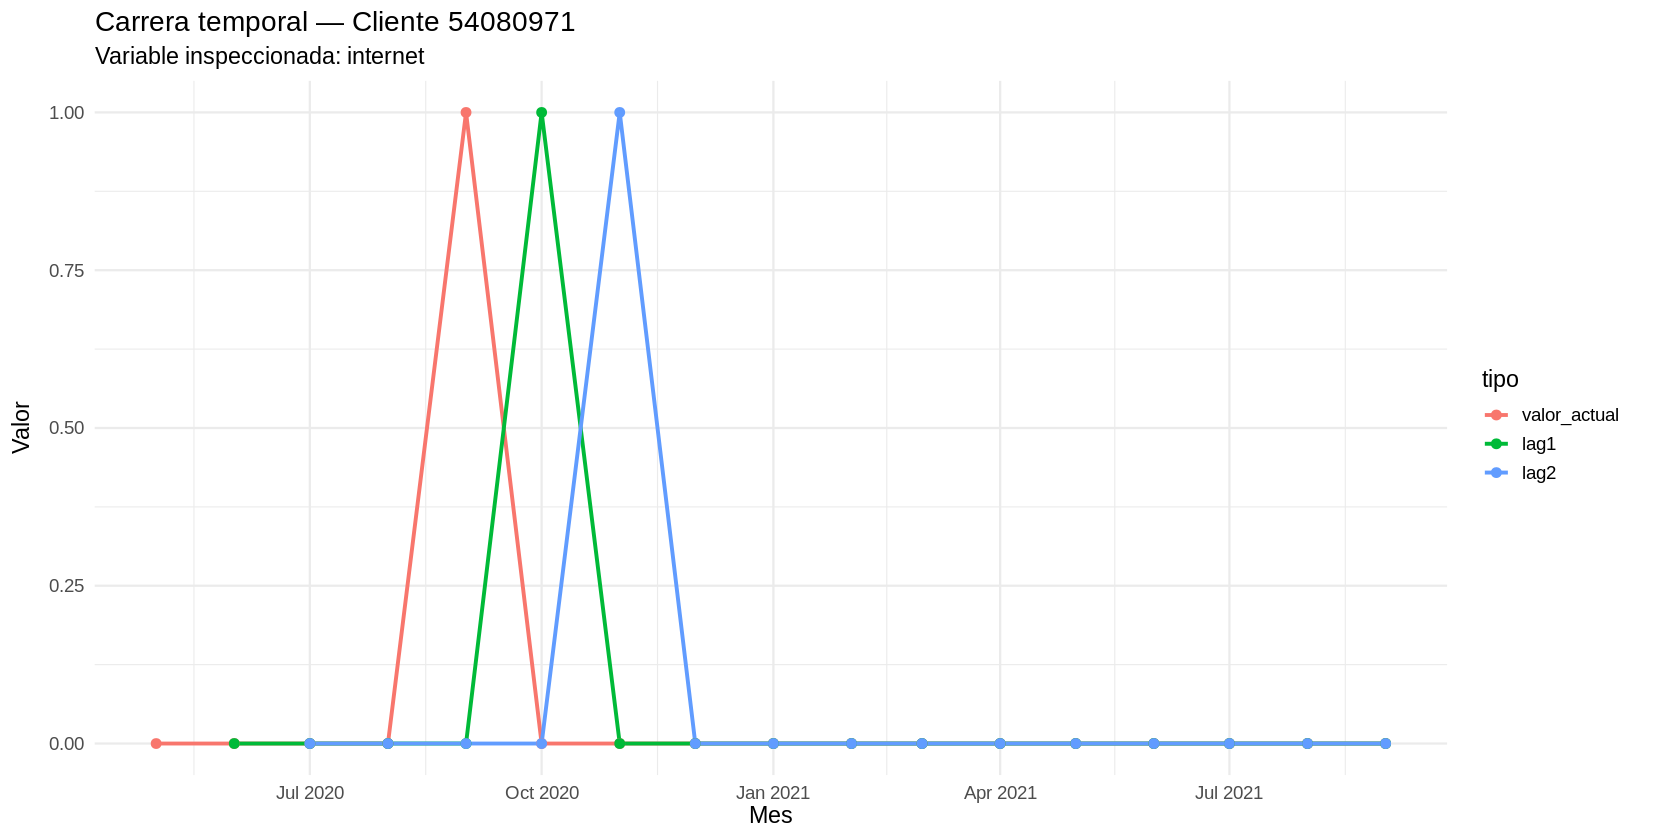

In [37]:
#===============================================================
# Inspección FE_hist - Carrera temporal para un cliente
#===============================================================

if (!require("ggplot2")) install.packages("ggplot2", repos="http://cran.us.r-project.org")
library(ggplot2)

# Aumento tamaño de los gráficos
options(repr.plot.width = 14, repr.plot.height = 7)

# 1) Elegir variable para inspección
variable_ejemplo <- cols_lagueables[1]
cat("Variable de ejemplo:", variable_ejemplo, "\n")

# 2) Elegir cliente aleatorio
set.seed(123)
cliente_ejemplo <- sample(unique(dataset$numero_de_cliente), 1)
cat("Cliente de ejemplo:", cliente_ejemplo, "\n")

# 3) Extraer historial del cliente
dt_cli <- dataset[numero_de_cliente == cliente_ejemplo,
                  .(numero_de_cliente,
                    foto_mes,
                    valor_actual = get(variable_ejemplo),
                    lag1 = get(paste0(variable_ejemplo, "_lag1")),
                    lag2 = get(paste0(variable_ejemplo, "_lag2")))]

setorder(dt_cli, foto_mes)

# 4) Convertir a formato largo
dt_cli_long <- melt(
  dt_cli,
  id.vars = c("numero_de_cliente", "foto_mes"),
  variable.name = "tipo",
  value.name = "valor"
)

# 5) Crear fecha real para eje X
dt_cli_long[, fecha := as.Date(
  paste(substr(as.character(foto_mes), 1, 4),
        substr(as.character(foto_mes), 5, 6), "01", sep = "-"))
]

# 6) Graficar
ggplot(dt_cli_long, aes(x = fecha, y = valor, color = tipo)) +
  geom_line(size = 1.1, na.rm = TRUE) +
  geom_point(size = 2.2, na.rm = TRUE) +
  labs(
    title = paste("Carrera temporal — Cliente", cliente_ejemplo),
    subtitle = paste("Variable inspeccionada:", variable_ejemplo),
    x = "Mes",
    y = "Valor"
  ) +
  theme_minimal(base_size = 14)


Total columnas delta1: 42 
Total columnas delta2: 42 
Muestra delta1: internet_delta1 cliente_edad_delta1 cliente_antiguedad_delta1 
Muestra delta2: internet_delta2 cliente_edad_delta2 cliente_antiguedad_delta2 


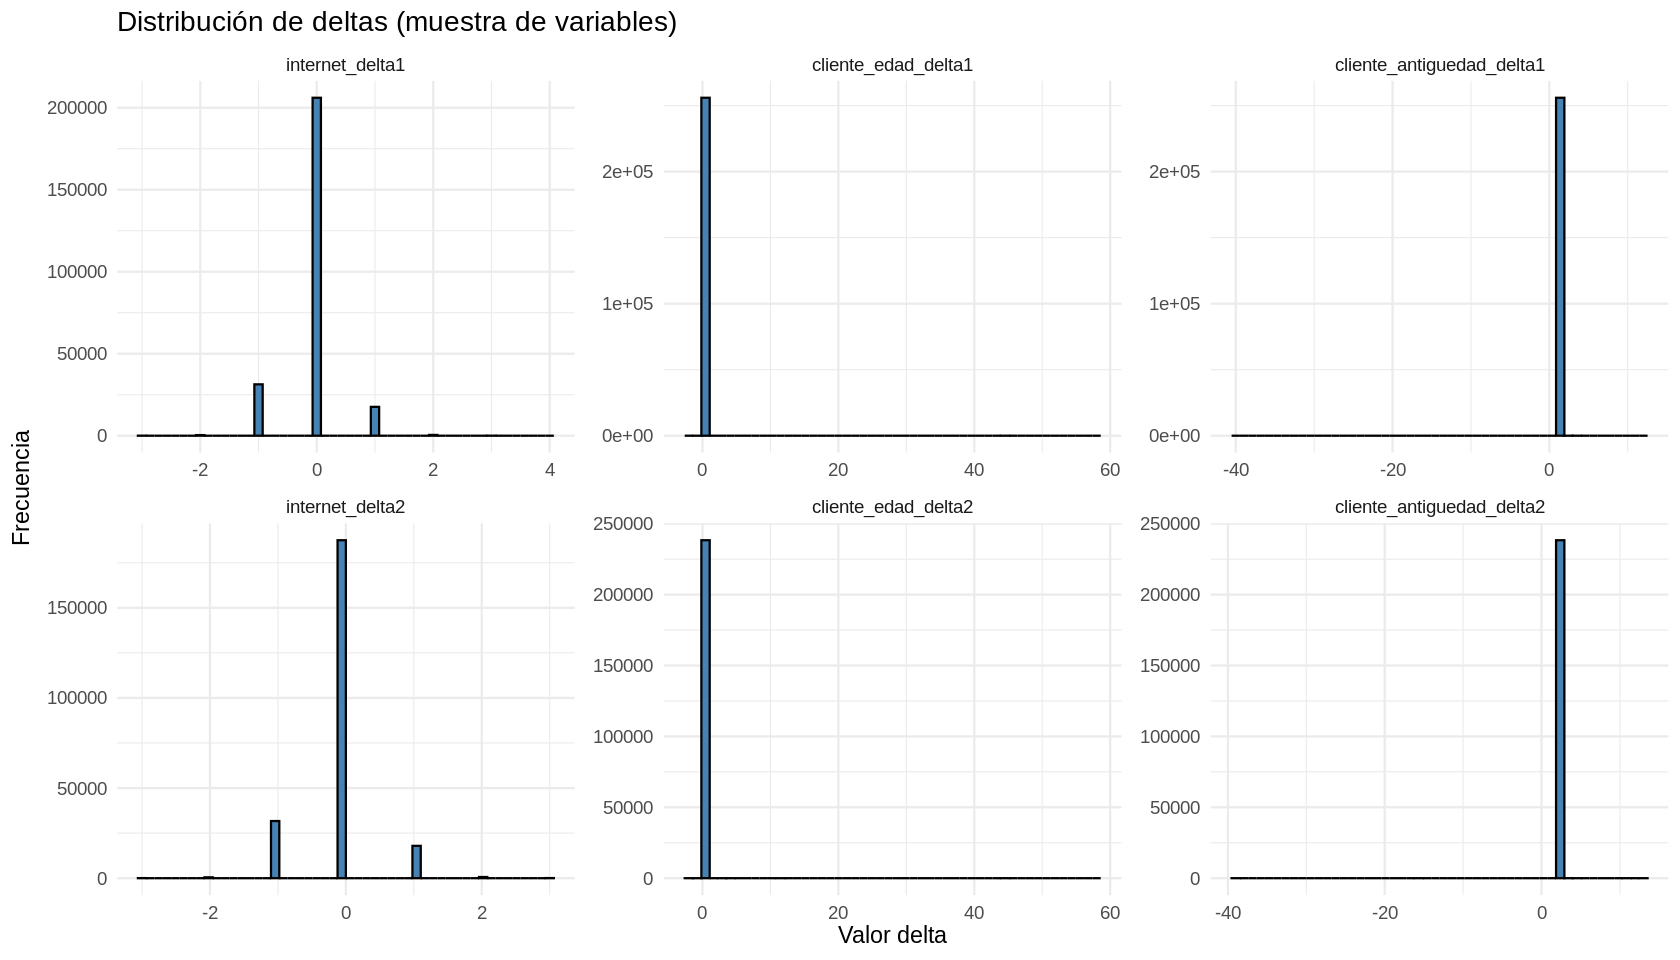

In [38]:
#===============================================================
# Inspección FE_hist - Distribución de Deltas
#===============================================================

if (!require("ggplot2")) install.packages("ggplot2", repos="http://cran.us.r-project.org")
library(ggplot2)

# Aumento tamaño de los gráficos
options(repr.plot.width = 14, repr.plot.height = 8)

# 1) Detectar columnas delta
delta1_cols <- grep("_delta1$", colnames(dataset), value = TRUE)
delta2_cols <- grep("_delta2$", colnames(dataset), value = TRUE)

cat("Total columnas delta1:", length(delta1_cols), "\n")
cat("Total columnas delta2:", length(delta2_cols), "\n")

# 2) Seleccionar una pequeña muestra para graficar
set.seed(42)
muestra_delta1 <- head(delta1_cols, 3)   # o sample(delta1_cols, 3)
muestra_delta2 <- head(delta2_cols, 3)   # o sample(delta2_cols, 3)

cat("Muestra delta1:", muestra_delta1, "\n")
cat("Muestra delta2:", muestra_delta2, "\n")

# 3) Armar dataset sólo con esas columnas
dt_deltas <- dataset[, c(muestra_delta1, muestra_delta2), with = FALSE]

# 4) Pasar a formato largo
dt_deltas_long <- melt(
  dt_deltas,
  measure.vars = colnames(dt_deltas),
  variable.name = "variable",
  value.name = "valor"
)

# 5) Eliminar NA para la visualización
dt_deltas_long <- dt_deltas_long[!is.na(valor)]

# 6) Graficar histogramas
ggplot(dt_deltas_long, aes(x = valor)) +
  geom_histogram(bins = 50, fill = "steelblue", color = "black") +
  facet_wrap(~ variable, scales = "free", ncol = 3) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Distribución de deltas (muestra de variables)",
    x = "Valor delta",
    y = "Frecuencia"
  )


#### 9.7.1.5  FE_rf Feature Engineering de nuevas variables a partir de hojas de Random Forest



In [39]:
#===============================================================
# 9.7.1.5 - FE_rf: Feature Engineering desde hojas de Random Forest
#---------------------------------------------------------------
# En esta etapa se entrena un Random Forest con LightGBM sobre
# los meses de entrenamiento definidos (202101, 202102, 202103)
# y se usan las hojas (leaf indices) de cada árbol como nuevas
# variables binarias:
#
#   rf_<árbol>_<hoja> = 1 si el registro cae en esa hoja
#                        0 en caso contrario
#
# Esto captura interacciones no lineales complejas y genera
# un conjunto de variables de alto nivel a partir de las
# estructuras del bosque.
#===============================================================

if (!require("lightgbm")) install.packages("lightgbm")
library(lightgbm)


Loading required package: lightgbm

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘lightgbm’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [40]:
#===============================================================
# Parámetros de Feature Engineering desde Random Forest (FE_rf)
#===============================================================

# Parámetros principales (ajustables)
PARAM$FE_rf$arbolitos       <- 20    # número de árboles
PARAM$FE_rf$hojas_por_arbol <- 16    # num_leaves
PARAM$FE_rf$datos_por_hoja  <- 100   # min_data_in_leaf
PARAM$FE_rf$mtry_ratio      <- 0.2   # feature_fraction_bynode

# Definición de clase binaria y meses de entrenamiento del RF
PARAM$FE_rf$train$clase01_valor1 <- c("BAJA+2", "BAJA+1")
PARAM$FE_rf$train$training       <- c(202101, 202102, 202103)

# Parámetros LightGBM para emular Random Forest
PARAM$FE_rf$lgb_param <- list(
  # parámetros principales del RF
  num_iterations          = PARAM$FE_rf$arbolitos,
  num_leaves              = PARAM$FE_rf$hojas_por_arbol,
  min_data_in_leaf        = PARAM$FE_rf$datos_por_hoja,
  feature_fraction_bynode = PARAM$FE_rf$mtry_ratio,

  # para que LightGBM se comporte como Random Forest
  boosting         = "rf",
  bagging_fraction = (1.0 - 1.0 / exp(1.0)),
  bagging_freq     = 1.0,
  feature_fraction = 1.0,

  # parámetros genéricos de LightGBM
  max_bin                = 31L,
  objective              = "binary",
  first_metric_only      = TRUE,
  boost_from_average     = TRUE,
  feature_pre_filter     = FALSE,
  force_row_wise         = TRUE,
  verbosity              = -100,
  max_depth              = -1L,
  min_gain_to_split      = 0.0,
  min_sum_hessian_in_leaf = 0.001,
  lambda_l1              = 0.0,
  lambda_l2              = 0.0,
  pos_bagging_fraction   = 1.0,
  neg_bagging_fraction   = 1.0,
  is_unbalance           = FALSE,
  scale_pos_weight       = 1.0,
  drop_rate              = 0.1,
  max_drop               = 50,
  skip_drop              = 0.5,
  extra_trees            = FALSE
)


In [41]:
#===============================================================
# Función: AgregaVarRandomForest
#---------------------------------------------------------------
# 1) Crea clase01 binaria a partir de clase_ternaria:
#      clase01 = 1 si BAJA+1 o BAJA+2
#      clase01 = 0 en otro caso.
# 2) Define campos_buenos como todas las columnas excepto
#    clase_ternaria y clase01.
# 3) Entrena un modelo LightGBM en modo Random Forest sobre los
#    meses definidos en PARAM$FE_rf$train$training.
# 4) Para cada período y cada árbol, genera variables binarias:
#    rf_<árbol>_<hoja> según la hoja en la que cae cada registro.
# 5) Limpia columnas auxiliares (clase01, entrenamiento).
#===============================================================

AgregaVarRandomForest <- function() {
  cat("inicio AgregaVarRandomForest()\n")
  gc(verbose = FALSE)

  #-------------------------------------------------------------
  # 1) Definir clase binaria clase01
  #-------------------------------------------------------------
  dataset[, clase01 := 0L]
  dataset[
    clase_ternaria %in% PARAM$FE_rf$train$clase01_valor1,
    clase01 := 1L
  ]

  #-------------------------------------------------------------
  # 2) Campos usados como features del RF
  #-------------------------------------------------------------
  campos_buenos <- setdiff(
    colnames(dataset),
    c("clase_ternaria", "clase01")
  )

  #-------------------------------------------------------------
  # 3) Definir filas de entrenamiento según foto_mes
  #-------------------------------------------------------------
  dataset[, entrenamiento :=
            as.integer(foto_mes %in% PARAM$FE_rf$train$training)]

  dtrain <- lgb.Dataset(
    data  = data.matrix(dataset[entrenamiento == 1, campos_buenos, with = FALSE]),
    label = dataset[entrenamiento == 1, clase01],
    free_raw_data = FALSE
  )

  #-------------------------------------------------------------
  # 4) Entrenar el Random Forest (LightGBM en modo RF)
  #-------------------------------------------------------------
  modelo <- lgb.train(
    data   = dtrain,
    param  = PARAM$FE_rf$lgb_param,
    verbose = -100
  )

  cat("  Fin construcción RandomForest\n")

  # (opcional) guardar modelo en disco
  lgb.save(modelo, file = "modelo_FE_rf.model")

  qarbolitos <- PARAM$FE_rf$lgb_param$num_iterations

  #-------------------------------------------------------------
  # 5) Generar variables rf_arbol_hoja por período
  #-------------------------------------------------------------
  periodos <- dataset[, unique(foto_mes)]

  for (periodo in periodos) {
    cat("  periodo =", periodo, "\n")

    datamatrix <- data.matrix(
      dataset[foto_mes == periodo, campos_buenos, with = FALSE]
    )

    cat("    Inicio predicción hojas\n")
    prediccion <- predict(
      modelo,
      datamatrix,
      type = "leaf"
    )
    cat("    Fin predicción hojas\n")

    # recorro cada árbol
    for (arbolito in 1:qarbolitos) {
      hojas_arbol <- unique(prediccion[, arbolito])

      # para cada hoja de ese árbol creo una variable binaria
      for (pos in seq_along(hojas_arbol)) {
        nodo_id <- hojas_arbol[pos]

        nombre_campo <- paste0(
          "rf_",
          sprintf("%03d", arbolito), "_",
          sprintf("%03d", nodo_id)
        )

        dataset[foto_mes == periodo,
                (nombre_campo) := as.integer(nodo_id == prediccion[, arbolito])]
      }
    }

    rm(prediccion, datamatrix)
    gc(verbose = FALSE)
  }

  #-------------------------------------------------------------
  # 6) Limpieza de columnas auxiliares
  #-------------------------------------------------------------
  dataset[, clase01 := NULL]
  dataset[, entrenamiento := NULL]

  gc(verbose = FALSE)
  cat("fin AgregaVarRandomForest()\n")
}


In [42]:
#===============================================================
# Ejecución FE_rf: agregar variables de hojas RF al dataset
#===============================================================

AgregaVarRandomForest()

cat("Cantidad de columnas luego de FE_rf:", ncol(dataset), "\n")

# Identifico columnas rf_ reales (rf_ seguidas de dígitos)
cols_rf <- grep("^rf_[0-9]", colnames(dataset), value = TRUE)
cat("Cantidad TOTAL de columnas rf_ generadas (reales):", length(cols_rf), "\n")

# Opcional: ver algunas
head(cols_rf, 20)


inicio AgregaVarRandomForest()
  Fin construcción RandomForest
  periodo = 202005 
    Inicio predicción hojas
    Fin predicción hojas
  periodo = 202006 
    Inicio predicción hojas
    Fin predicción hojas
  periodo = 202007 
    Inicio predicción hojas
    Fin predicción hojas
  periodo = 202008 
    Inicio predicción hojas
    Fin predicción hojas
  periodo = 202009 
    Inicio predicción hojas
    Fin predicción hojas
  periodo = 202010 
    Inicio predicción hojas
    Fin predicción hojas
  periodo = 202011 
    Inicio predicción hojas
    Fin predicción hojas
  periodo = 202012 
    Inicio predicción hojas
    Fin predicción hojas
  periodo = 202101 
    Inicio predicción hojas
    Fin predicción hojas
  periodo = 202102 
    Inicio predicción hojas
    Fin predicción hojas
  periodo = 202103 
    Inicio predicción hojas
    Fin predicción hojas
  periodo = 202104 
    Inicio predicción hojas
    Fin predicción hojas
  periodo = 202105 
    Inicio predicción hojas
    Fin predi

[1] "rf_001_006" "rf_001_009" "rf_002_005" "rf_002_006" "rf_002_010"
 [6] "rf_003_006" "rf_003_013" "rf_004_013" "rf_004_008" "rf_004_001"
[11] "rf_004_012" "rf_005_008" "rf_005_015" "rf_005_010" "rf_005_011"
[16] "rf_006_007" "rf_006_002" "rf_007_003" "rf_007_008" "rf_008_006"

In [43]:
#===============================================================
# Inspección FE_rf - Sparsidad de variables rf_
#===============================================================

if (length(cols_rf) > 0) {

  prop_ones_rf <- dataset[, lapply(.SD, function(x) mean(x == 1, na.rm = TRUE)),
                          .SDcols = cols_rf]

  prop_ones_long <- data.table(
    variable = names(prop_ones_rf),
    prop_1   = as.numeric(prop_ones_rf[1, ])
  )

  setorder(prop_ones_long, prop_1)

  cat("Variables rf_ con MENOR proporción de 1s:\n")
  head(prop_ones_long, 10)

  cat("\nVariables rf_ con MAYOR proporción de 1s:\n")
  tail(prop_ones_long, 10)
} else {
  cat("No se encontraron columnas rf_ para inspeccionar.\n")
}


Variables rf_ con MENOR proporción de 1s:

Variables rf_ con MAYOR proporción de 1s:


variable,prop_1
<chr>,<dbl>
rf_002_005,0.7891554
rf_008_006,0.8004940
rf_014_008,0.8048059
rf_010_009,0.8226195
rf_018_006,0.8337024
rf_015_001,0.8498701
rf_003_006,0.8635380
rf_017_012,0.8718036
rf_007_003,0.8758669


In [44]:
#===============================================================
# Inspección FE_rf - Muestra de filas con rf_
#===============================================================

if (length(cols_rf) > 0) {
  set.seed(2025)
  muestra_rf <- head(cols_rf, 10)   # o sample(cols_rf, 10)

  cat("Muestra de variables rf_ inspeccionadas:\n")
  print(muestra_rf)

  muestra_filas <- sample(nrow(dataset), 5)

  dataset[muestra_filas,
          c("numero_de_cliente", "foto_mes", muestra_rf),
          with = FALSE]
} else {
  cat("No se encontraron columnas rf_ para inspeccionar.\n")
}


Muestra de variables rf_ inspeccionadas:
 [1] "rf_001_006" "rf_001_009" "rf_002_005" "rf_002_006" "rf_002_010"
 [6] "rf_003_006" "rf_003_013" "rf_004_013" "rf_004_008" "rf_004_001"


numero_de_cliente,foto_mes,rf_001_006,rf_001_009,rf_002_005,rf_002_006,rf_002_010,rf_003_006,rf_003_013,rf_004_013,rf_004_008,rf_004_001
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
129097971,202107,1,0,1,0,0,1,0,1,0,0
39648521,202010,1,0,1,0,0,1,0,1,0,0
72714971,202005,1,0,1,0,0,1,0,1,0,0
58245911,202107,1,0,1,0,0,1,0,1,0,0
112518341,202101,1,0,0,1,0,1,0,0,1,0


# 9.7.1.6 - Objetivo del bloque "Canaritos Asesinos" (OPCIONAL)

In [215]:
# En esta etapa se realiza una selección automática de variables.
#
# Idea central:
#   1) Se agregan variables aleatorias ("canaritos") al dataset.
#   2) Se entrena un LightGBM con la métrica de ganancia del negocio.
#   3) Se calcula la importancia de todas las variables (reales + canaritos).
#   4) Se usa el ranking de importancia de los canaritos como referencia:
#        - cualquier variable real menos importante que esa "capa de ruido"
#          se considera prescindible y se elimina del dataset.
#
# Objetivo:
#   Quedarnos sólo con las variables que aportan más señal que el ruido
#   aleatorio, reduciendo dimensionalidad y riesgo de overfitting antes de
#   entrenar el modelo final de churn.
#===============================================================

In [216]:
# Vector global para almacenar la posición típica de corte
# (se usa dentro de la métrica de ganancia)
#VPOS_CORTE <- c()

# Contador global para numerar archivos de importancia
#GVEZ <- 1

# Campos que NUNCA se deben eliminar del dataset
#campitos <- c("numero_de_cliente", "foto_mes", "clase_ternaria")


In [217]:
#===============================================================
# Métrica custom para LightGBM: fganancia_lgbm_meseta
#---------------------------------------------------------------
# - Recibe las probabilidades del modelo y el dataset de LightGBM
# - Reconstruye una tabla con:
#       prob : probabilidad predicha
#       gan  : ganancia esperada por registro
# - Ordena por prob (de mayor a menor), acumula ganancia y luego
#   busca la "meseta" de máximo desempeño:
#       * Ordena por gan_acum decreciente
#       * Toma la meseta de tamaño 500
#       * La métrica es el promedio de esa ganancia acumulada
# - Guarda en VPOS_CORTE la posición típica del corte.
#===============================================================

#fganancia_lgbm_meseta <- function(probs, datos) {
  #vlabels <- get_field(datos, "label")
  #vpesos  <- get_field(datos, "weight")

  # Ganancia por registro según clase y peso
  #tbl <- as.data.table(list(
    #prob = probs,
    #gan  = ifelse(
      #vlabels == 1 & vpesos > 1,
      #PARAM$CN$train$gan1,
      #PARAM$CN$train$gan0
    )
  ))

  # Ordeno por probabilidad decreciente
  #setorder(tbl, -prob)
  #tbl[, posicion := .I]

  # Ganancia acumulada
  #tbl[, gan_acum := cumsum(gan)]

  # Busco la meseta de mejor desempeño
  #setorder(tbl, -gan_acum)
  #gan <- mean(tbl[1:500, gan_acum])      # meseta de tamaño 500

  # Posición "típica" del corte en la meseta
  #pos_meseta <- tbl[1:500, median(posicion)]
  #VPOS_CORTE <<- c(VPOS_CORTE, pos_meseta)

  #return(list(
    #name          = "ganancia",
    #value         = gan,
    #higher_better = TRUE
  ))
}


In [218]:
#===============================================================
# Función: CanaritosAsesinos
#---------------------------------------------------------------
# Agrega variables aleatorias ("canaritos") y entrena un modelo
# LightGBM para obtener importancias:
#
# 1) Crea clase01 binaria:
#       1 si clase_ternaria ∈ {BAJA+1, BAJA+2}
#       0 en caso contrario.
# 2) Agrega canaritos_ratio * ncol(dataset) columnas aleatorias.
# 3) Entrena LightGBM sobre meses de training con undersampling.
# 4) Calcula importancia de variables.
# 5) Toma los canaritos como "capa geológica":
#       - Calcula la mediana de su posición en el ranking
#       - Suma canaritos_desvios * sd(pos)
#       - Corta ahí: todo lo que queda por debajo del umbral
#         se considera poco importante y se elimina.
# 6) Devuelve la tabla de importancia y deja el dataset reducido.
#===============================================================

#CanaritosAsesinos <- function(
  #canaritos_ratio,
  #canaritos_desvios,
  #canaritos_semilla
) {

  #cat("inicio CanaritosAsesinos()\n")
  #gc(verbose = FALSE)

  #-------------------------------------------------------------
  # 1) Definir clase01 (target binario)
  #-------------------------------------------------------------
  #dataset[, clase01 := 0L]
  #dataset[
    #clase_ternaria %in% PARAM$CN$train$clase01_valor1,
    #clase01 := 1L
  ]

  #-------------------------------------------------------------
  # 2) Agregar canaritos aleatorios
  #-------------------------------------------------------------
  #set.seed(canaritos_semilla, kind = "L'Ecuyer-CMRG")
  #n_canaritos <- as.integer(ncol(dataset) * canaritos_ratio)

  #for (i in 1:n_canaritos) {
    #dataset[, paste0("canarito", i) := runif(nrow(dataset))]
  }

  # Campos que entran al modelo (excluyo campitos y clase01)
  #campos_buenos <- setdiff(
    #colnames(dataset),
    #c(campitos, "clase01")
  )

  #-------------------------------------------------------------
  # 3) Definir filas de entrenamiento con undersampling
  #-------------------------------------------------------------
  #azar <- runif(nrow(dataset))

  #dataset[, entrenamiento :=
            #as.integer(
              #foto_mes %in% PARAM$CN$train$training &
                #(clase01 == 1 | azar < PARAM$CN$train$undersampling)
            )]

  #dtrain <- lgb.Dataset(
    #data  = data.matrix(dataset[entrenamiento == 1, campos_buenos, with = FALSE]),
    #label = dataset[entrenamiento == 1, clase01],
    #weight = dataset[
      #entrenamiento == 1,
      #ifelse(clase_ternaria %in% PARAM$CN$train$positivos, 1.0000001, 1.0)
    ],
    #free_raw_data = FALSE
  )

  #dvalid <- lgb.Dataset(
    #data  = data.matrix(dataset[foto_mes %in% PARAM$CN$train$validation, campos_buenos, with = FALSE]),
    #label = dataset[foto_mes %in% PARAM$CN$train$validation, clase01],
    #weight = dataset[
      #foto_mes %in% PARAM$CN$train$validation,
      #ifelse(clase_ternaria %in% PARAM$CN$train$positivos, 1.0000001, 1.0)
    ],
    #free_raw_data = FALSE
  )

  #-------------------------------------------------------------
  # 4) Parámetros del LightGBM para importance
  #-------------------------------------------------------------
  #param <- list(
    objective            = "binary",
    metric               = "custom",
    first_metric_only    = TRUE,
    boost_from_average   = TRUE,
    feature_pre_filter   = FALSE,
    verbosity            = -100,
    seed                 = canaritos_semilla,
    max_depth            = -1,
    min_gain_to_split    = 0.0,
    lambda_l1            = 0.0,
    lambda_l2            = 0.0,
    max_bin              = 31,
    num_iterations       = 9999,   # limitado por early_stopping_rounds
    force_row_wise       = TRUE,
    learning_rate        = 0.065,
    feature_fraction     = 1.0,
    min_data_in_leaf     = 260,
    num_leaves           = 60,
    early_stopping_rounds = 200,
    num_threads          = 1
  )

  #-------------------------------------------------------------
  # 5) Entrenar modelo con métrica de ganancia
  #-------------------------------------------------------------
  #set.seed(canaritos_semilla, kind = "L'Ecuyer-CMRG")
  #modelo <- lgb.train(
    #data   = dtrain,
    #valids = list(valid = dvalid),
    #eval   = fganancia_lgbm_meseta,
    #param  = param,
    #verbose = -100
  )

  #-------------------------------------------------------------
  # 6) Importancia de variables
  #-------------------------------------------------------------
  #tb_importancia <- lgb.importance(model = modelo)
  #tb_importancia[, pos := .I]

  # Guardo importancia de esta corrida
  #fwrite(
    #b_importancia,
    #file = paste0("impo_", GVEZ, ".txt"),
    #sep  = "\t"
  )

  #GVEZ <<- GVEZ + 1

  #-------------------------------------------------------------
  # 7) Umbral basado en canaritos
  #-------------------------------------------------------------
  #umbral <- tb_importancia[
    #Feature %like% "canarito",
    #median(pos) + canaritos_desvios * sd(pos)
  ]  # corto en mediana + desvios

  # Variables útiles: por encima del "techo" de los canaritos y
  # que no sean canaritos
  #col_utiles <- tb_importancia[
    #pos < umbral & !(Feature %like% "canarito"),
    #Feature
  ]

  # Me aseguro de conservar siempre los identificadores / target
  #col_utiles <- unique(c(col_utiles, campitos))

  # El resto de las columnas se eliminan del dataset
  #col_inutiles <- setdiff(colnames(dataset), col_utiles)

  #dataset[, (col_inutiles) := NULL]

  #cat("fin CanaritosAsesinos()\n")

  #return(tb_importancia)
}


In [219]:
#===============================================================
# Parámetros de configuración para Canaritos Asesinos (PARAM$CN)
#===============================================================

# Estos DOS parámetros se ajustan para controlar la poda:
#PARAM$CN$ratio   <- 0.2   # proporción de canaritos respecto al nro de columnas
#PARAM$CN$desvios <- 2     # cuántos desvíos por encima de la mediana de canaritos

# Parámetros quasi fijos del esquema de entrenamiento para canaritos
#PARAM$CN$train$clase01_valor1 <- c("BAJA+2", "BAJA+1")
#PARAM$CN$train$positivos      <- c("BAJA+2")

#PARAM$CN$train$training       <- c(202101, 202102, 202103)
#PARAM$CN$train$validation     <- c(202105)

#PARAM$CN$train$undersampling  <- 0.1

#PARAM$CN$train$gan1 <- 117000
#PARAM$CN$train$gan0 <- -3000


In [220]:
#===============================================================
# Ejecución de Canaritos Asesinos y chequeos básicos
#===============================================================

#tb_importancia <- CanaritosAsesinos(
  #canaritos_ratio   = PARAM$CN$ratio,
  #canaritos_desvios = PARAM$CN$desvios,
  #canaritos_semilla = PARAM$semilla_primigenia
)

# Guardo la importancia final en un archivo consolidado
#fwrite(
  #tb_importancia,
  #file = "canaritos.txt",
  #sep  = "\t"
)

# Verifico cuántas columnas quedaron luego de la poda
#cat("Cantidad de columnas luego de CanaritosAsesinos:", ncol(dataset), "\n")

# (opcional) ver primeras columnas
#head(colnames(dataset), 40)


inicio CanaritosAsesinos()
fin CanaritosAsesinos()
Cantidad de columnas luego de CanaritosAsesinos: 238 


[1] "numero_de_cliente"           "foto_mes"                   
 [3] "cliente_edad"                "cliente_antiguedad"         
 [5] "mrentabilidad"               "mrentabilidad_annual"       
 [7] "mcomisiones"                 "mactivos_margen"            
 [9] "cproductos"                  "mcuenta_corriente"          
[11] "mcaja_ahorro"                "cdescubierto_preacordado"   
[13] "mcuentas_saldo"              "ctarjeta_visa_transacciones"
[15] "mtarjeta_visa_consumo"       "mtarjeta_master_consumo"    
[17] "mprestamos_personales"       "cpayroll_trx"               
[19] "mpayroll"                    "chomebanking_transacciones" 
[21] "ctrx_quarter"                "Master_fechaalta"           
[23] "Master_mpagominimo"          "Visa_fechaalta"             
[25] "Visa_mpagominimo"            "clase_ternaria"             
[27] "ctrx_quarter_normalizado"    "mpayroll_sobre_edad"        
[29] "vm_fechaalta"                "vm_mpagominimo"             
[31] "cliente_edad_lag1"           "cliente_antiguedad_lag1"    
[33] "mrentabilidad_lag1"          "mrentabilidad_annual_lag1"  
[35] "mcomisiones_lag1"            "mactivos_margen_lag1"       
[37] "mpasivos_margen_lag1"        "cproductos_lag1"            
[39] "mcaja_ahorro_lag1"           "mcuentas_saldo_lag1"

### 9.7.2 Modelado

#### 9.7.2.1 Training Strategy


In [45]:
# Estrategia simple y robusta usando el dataset gerencial:
#
#   • future  = 202109   → mes futuro completo (para submit Kaggle)
#
#   • validation = 202107 (sin undersampling)
#
#   • training  = 202005–202105
#         - se usan todos los BAJA+1 y BAJA+2
#         - se hace undersampling del 20% de los CONTINUA
#
# Objetivo:
#   - Usar la mayor cantidad de meses posible.
#   - NO eliminar meses por COVID ni otros filtros.
#   - Mantener un esquema estable para la Optimización Bayesiana.

#===============================================================
# Definición de meses de training / validation y clase01
#===============================================================

# Mes de validación (sin undersampling)
PARAM$trainingstrategy$validate <- c(202107)

# Meses usados para entrenamiento (con undersampling en CONTINUA)
PARAM$trainingstrategy$training <- c(
  202005, 202006,
  202007, 202008, 202009, 202010, 202011, 202012,
  202101, 202102, 202103, 202104, 202105
)

# Porcentaje de CONTINUA que se mantiene en training (undersampling)
PARAM$trainingstrategy$training_pct <- 0.2

# Clases positivas para clase01
PARAM$trainingstrategy$positivos <- c("BAJA+1", "BAJA+2")

# Defino clase01 (target binario)
dataset[, clase01 := ifelse(
  clase_ternaria %in% PARAM$trainingstrategy$positivos,
  1L, 0L
)]

# Campos que se usarán como features (se excluyen explícitamente:
#   clase_ternaria, clase01 y azar)
campitos_modelo <- c("clase_ternaria", "clase01", "azar")
campos_buenos <- setdiff(colnames(dataset), campitos_modelo)

#---------------------------------------------------------------
# Undersampling de CONTINUA solo por VELOCIDAD
#---------------------------------------------------------------
set.seed(PARAM$semilla_primigenia, kind = "L'Ecuyer-CMRG")
dataset[, azar := runif(nrow(dataset))]

dataset[, fold_train :=
          foto_mes %in% PARAM$trainingstrategy$training &
          (clase_ternaria %in% c("BAJA+1", "BAJA+2") |
             azar < PARAM$trainingstrategy$training_pct)]


In [46]:
#===============================================================
# ESTRATEGIA DE PESOS POR AÑO (para la Optimización Bayesiana)
#---------------------------------------------------------------
# Idea:
#   - Los años más recientes reciben mayor peso en training.
#   - Extraigo el año de foto_mes y lo convierto en un peso entero:
#       año más viejo  → peso 1
#       siguiente año  → peso 2
#       ...
#===============================================================

# Extraer el año de foto_mes
dataset[, anio := as.integer(substr(as.character(foto_mes), 1, 4))]

# Años únicos ordenados (del más viejo al más reciente)
anios_unicos <- sort(unique(dataset$anio))

# Asignar pesos normalizados por año
dataset[, peso_norm := match(anio, anios_unicos)]

# Verificar asignación de pesos
cat("Distribución de pesos por año en Optimización Bayesiana:\n")
print(dataset[, .(peso = unique(peso_norm)), by = anio][order(anio)])


Distribución de pesos por año en Optimización Bayesiana:
    anio  peso
   <int> <int>
1:  2020     1
2:  2021     2


In [47]:
#===============================================================
# Construcción de dtrain y dvalidate para LightGBM
#===============================================================

if (!require("lightgbm")) install.packages("lightgbm")
library(lightgbm)

#---------------------------------------------------------------
# Dataset de entrenamiento (training)
#---------------------------------------------------------------
dtrain <- lgb.Dataset(
  data   = data.matrix(dataset[fold_train == TRUE, campos_buenos, with = FALSE]),
  label  = dataset[fold_train == TRUE, clase01],
  weight = dataset[fold_train == TRUE, peso_norm],  # pesos por año
  free_raw_data = TRUE
)

#---------------------------------------------------------------
# Dataset de validación (validation)
#---------------------------------------------------------------
dvalidate <- lgb.Dataset(
  data  = data.matrix(
    dataset[foto_mes %in% PARAM$trainingstrategy$validate, campos_buenos, with = FALSE]
  ),
  label = dataset[foto_mes %in% PARAM$trainingstrategy$validate, clase01],
  free_raw_data = TRUE
)

# Chequeo rápido de tamaños
cat("Filas en training:", sum(dataset$fold_train == TRUE), "\n")
cat("Filas en validation:", sum(dataset$foto_mes %in% PARAM$trainingstrategy$validate), "\n")


Filas en training: 42986 
Filas en validation: 16551 


In [48]:
#===============================================================
# Inspección 1: distribución por mes, clase y fold_train
#===============================================================

resumen_mes <- dataset[,
  .(
    n        = .N,
    positivos = sum(clase01 == 1),
    continua = sum(clase01 == 0),
    en_train = sum(fold_train == TRUE),
    en_valid = sum(foto_mes %in% PARAM$trainingstrategy$validate)
  ),
  by = foto_mes
][order(foto_mes)]

print(resumen_mes)


    foto_mes     n positivos continua en_train en_valid
       <int> <int>     <int>    <int>    <int>    <int>
 1:   202005 15082       116    14966     3141        0
 2:   202006 15323       126    15197     3155        0
 3:   202007 15522       108    15414     3260        0
 4:   202008 15695        89    15606     3231        0
 5:   202009 15854       105    15749     3244        0
 6:   202010 15996       107    15889     3274        0
 7:   202011 16113       109    16004     3216        0
 8:   202012 16172       118    16054     3293        0
 9:   202101 16230       144    16086     3388        0
10:   202102 16289       186    16103     3460        0
11:   202103 16365       170    16195     3457        0
12:   202104 16394       182    16212     3481        0
13:   202105 16469       183    16286     3386        0
14:   202106 16507       196    16311        0        0
15:   202107 16551       265    16286        0        1
16:   202108 16553       142    16411        0  

In [49]:
#===============================================================
# Inspección 2: efecto del undersampling en training
#===============================================================

dist_train <- dataset[fold_train == TRUE,
  .(
    total    = .N,
    positivos = sum(clase01 == 1),
    continua  = sum(clase01 == 0)
  )
]

cat("Resumen training (fold_train == TRUE):\n")
print(dist_train)

cat("\nProporción de positivos en training:\n")
print(dist_train$positivos / dist_train$total)


Resumen training (fold_train == TRUE):
   total positivos continua
   <int>     <int>    <int>
1: 42986      1743    41243

Proporción de positivos en training:
[1] 0.04054809


In [50]:
#===============================================================
# Inspección 3: pesos por año en el fold de training
#===============================================================

res_pesos_train <- dataset[fold_train == TRUE,
  .(
    n_filas = .N,
    peso_medio = mean(peso_norm),
    peso_min   = min(peso_norm),
    peso_max   = max(peso_norm)
  ),
  by = anio
][order(anio)]

cat("Distribución de pesos por año en TRAIN:\n")
print(res_pesos_train)


Distribución de pesos por año en TRAIN:
    anio n_filas peso_medio peso_min peso_max
   <int>   <int>      <num>    <int>    <int>
1:  2020   25814          1        1        1
2:  2021   17172          2        2        2


In [51]:
#===============================================================
# Inspección 4: sanidad de features en training
#===============================================================

# 1) Chequear NAs por columna
na_por_col <- dataset[fold_train == TRUE,
  sapply(.SD, function(x) sum(is.na(x))),
  .SDcols = campos_buenos
]

na_por_col <- sort(na_por_col, decreasing = TRUE)
cat("Top 20 columnas con más NAs en training:\n")
print(head(na_por_col, 20))

# 2) Chequear columnas constantes
constantes <- dataset[fold_train == TRUE,
  sapply(.SD, function(x) length(unique(x)) == 1),
  .SDcols = campos_buenos
]

cat("\nCantidad de columnas constantes en training:", sum(constantes), "\n")
if (sum(constantes) > 0) {
  cat("Ejemplos de columnas constantes:\n")
  print(head(names(constantes[constantes]), 20))
}


Top 20 columnas con más NAs en training:
       vm_status02_delta12      Master_status_delta12 
                     40451                      40427 
  Master_fechaalta_delta12 Master_mpagominimo_delta12 
                     40427                      40427 
         vm_status02_lag12        Master_status_lag12 
                     40362                      40350 
    Master_fechaalta_lag12   Master_mpagominimo_lag12 
                     40350                      40350 
       Visa_status_delta12     Visa_fechaalta_delta12 
                     40218                      40218 
  Visa_mpagominimo_delta12        vm_status01_delta12 
                     40218                      40194 
      vm_fechaalta_delta12          Visa_status_lag12 
                     40194                      40138 
      Visa_fechaalta_lag12     Visa_mpagominimo_lag12 
                     40138                      40138 
         vm_status01_lag12         vm_fechaalta_lag12 
                     401

# 9.7.1.7 — Inspección Final del Dataset transformado

En este bloque se inspeccionan todas las transformaciones aplicadas al dataset:
- variables rotas
- lags (1,2,3,6,12)
- deltas (1,2,3,6,12)
- tendencias (ventana 6)
- RF leaves
- canaritos asesinos
- consistencia temporal
- NA patterns
- columnas constantes

Este diagnóstico es previo al entrenamiento final y a la búsqueda bayesiana de hiperparámetros.

In [52]:
cat("\n=====================================================\n")
cat("   🔍 DIAGNÓSTICO INTEGRAL DEL FEATURE ENGINEERING\n")
cat("=====================================================\n\n")

# ---------------------------------------------------------------------
# 1) Columnas generadas: resumen general
# ---------------------------------------------------------------------
cat("✔ Cantidad TOTAL de columnas en dataset:", ncol(dataset), "\n")
cat("✔ Cantidad TOTAL de filas:", nrow(dataset), "\n\n")

# ---------------------------------------------------------------------
# 2) Top 25 columnas con más NA (training-only)
# ---------------------------------------------------------------------
cat("-----------------------------------------------------\n")
cat(" 1) Top columnas con más NA en TRAINING\n")
cat("-----------------------------------------------------\n")

train_rows <- dataset[fold_train == TRUE]

na_por_col <- sapply(train_rows, function(x) sum(is.na(x)))
na_top <- sort(na_por_col, decreasing = TRUE)[1:25]

print(na_top)


# ---------------------------------------------------------------------
# 3) Chequeo de columnas CONSTANTES
# ---------------------------------------------------------------------
cat("\n-----------------------------------------------------\n")
cat(" 2) Columnas constantes (TRAINING)\n")
cat("-----------------------------------------------------\n")

constantes <- names(which(sapply(train_rows, function(x) length(unique(x)) == 1)))

if (length(constantes) == 0) {
  cat("✔ NO hay columnas constantes\n")
} else {
  print(constantes)
}


# ---------------------------------------------------------------------
# 4) Diagnóstico NA en lags/deltas grandes (1,2,3,6,12)
# ---------------------------------------------------------------------
cat("\n-----------------------------------------------------\n")
cat(" 3) Diagnóstico NA en lags y deltas grandes\n")
cat("-----------------------------------------------------\n")

lags_a_ver <- c(1,2,3,6,12)
vars_base <- c("mrentabilidad", "mcomisiones", "mactivos_margen",
               "mpasivos_margen", "mcuentas_saldo", "ctarjeta_visa_transacciones")

for (vb in vars_base) {
  for (L in lags_a_ver) {
    vname <- paste0(vb, "_lag", L)
    if (vname %in% names(dataset)) {
      na_total <- sum(is.na(dataset[[vname]]))
      clientes <- unique(dataset[is.na(get(vname)) & !is.na(numero_de_cliente), numero_de_cliente])
      cat("\nVariable:", vname,
          "\n  - NA totales:", na_total,
          "\n  - Clientes afectados:", length(clientes), "\n")
    }
  }
}


# ---------------------------------------------------------------------
# 5) Diagnóstico de columnas rotas (valores todos NA)
# ---------------------------------------------------------------------
cat("\n-----------------------------------------------------\n")
cat(" 4) Columnas rotas (100% NA)\n")
cat("-----------------------------------------------------\n")

rotas <- names(which(colSums(is.na(dataset)) == nrow(dataset)))

if (length(rotas) == 0) {
  cat("✔ NO hay columnas completamente rotas\n")
} else {
  print(rotas)
}


# ---------------------------------------------------------------------
# 6) Verificar hojas RF (variables rf_XXX_YYY)
# ---------------------------------------------------------------------
cat("\n-----------------------------------------------------\n")
cat(" 5) Diagnóstico de variables RF leaves\n")
cat("-----------------------------------------------------\n")

rf_cols <- grep("^rf_", names(dataset), value = TRUE)

cat("✔ Cantidad de hojas RF presentes:", length(rf_cols), "\n")

if (length(rf_cols) > 0) {
  cat("✔ Ejemplo de variables RF:\n")
  print(head(rf_cols, 12))
}


# ---------------------------------------------------------------------
# 7) Verificar que clase01 y fold_train existan y sean coherentes
# ---------------------------------------------------------------------
cat("\n-----------------------------------------------------\n")
cat(" 6) Diagnóstico de clase01 y fold_train\n")
cat("-----------------------------------------------------\n")

if ("clase01" %in% names(dataset)) {
  print(dataset[, .N, by=clase01])
} else {
  cat("❌ clase01 NO existe\n")
}

if ("fold_train" %in% names(dataset)) {
  print(dataset[, .N, by=fold_train])
} else {
  cat("❌ fold_train NO existe\n")
}


cat("\n=====================================================\n")
cat("   ✔ FIN DIAGNÓSTICO FE — Todo OK para continuar\n")
cat("=====================================================\n")



   🔍 DIAGNÓSTICO INTEGRAL DEL FEATURE ENGINEERING

✔ Cantidad TOTAL de columnas en dataset: 832 
✔ Cantidad TOTAL de filas: 273666 

-----------------------------------------------------
 1) Top columnas con más NA en TRAINING
-----------------------------------------------------
       vm_status02_delta12      Master_status_delta12 
                     40451                      40427 
  Master_fechaalta_delta12 Master_mpagominimo_delta12 
                     40427                      40427 
         vm_status02_lag12        Master_status_lag12 
                     40362                      40350 
    Master_fechaalta_lag12   Master_mpagominimo_lag12 
                     40350                      40350 
       Visa_status_delta12     Visa_fechaalta_delta12 
                     40218                      40218 
  Visa_mpagominimo_delta12        vm_status01_delta12 
                     40218                      40194 
      vm_fechaalta_delta12          Visa_status_lag12 
   

####  9.7.2.2. Hyperparameter Tuning

* Clase binaria que se optimiza :  positivos = [ BAJA+1, BAJA+2 ]

* Metrica que se optimiza **AUC** Area Under Curve de la  ROC Curve

es muy importante notar que intencionalmente  **NO** se está optimizando la funcion de ganancia del problema

* Cantidad de iteraciones inteligentes de la Optimizacion Bayesiana = **40**

* Parametros no default, fijos de LightGBM que no se optimizan
  * max_bin = 31 , Alienigenas Ancestrales contruyeron las pirámides y dejaron a la humanidad en un jeroglifico  *max_bin=31*
  * feature_fraction = 0.5  para poner algo que generalmente no falla
  * learning_rate = 0.03  para que aprenda lento


* Parametros que se optimizan en la Bayesian Optimization
  * num_leaves  [8, 256]
  * min_data_in_leaf  [8, 8192]

In [53]:
# paquetes necesarios para la Bayesian Optimization
if(!require("DiceKriging")) install.packages("DiceKriging")
require("DiceKriging")

if(!require("mlrMBO")) install.packages("mlrMBO")
require("mlrMBO")

Loading required package: DiceKriging

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘DiceKriging’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: DiceKriging

Loading required package: mlrMBO

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘mlrMBO’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘XML’, ‘fastmatch’, ‘RcppArmadillo’, ‘mlr’, ‘ParamHelpers’, ‘smoof’, ‘BBmisc’, ‘checkmate’, ‘lhs’, ‘parallelMap’


Loading required package: mlrMBO

Loading required package: mlr

Loading required package: ParamHelpers


Attaching package: ‘ParamHelpers’


The following object is masked from ‘package:R.utils’:

    isVector



Attaching package: ‘mlr’


The following objects are masked from ‘package

Definición de la Bayesian Optimization
<br> Si se desea optimizar un hiperparámetro que esta como fijo, debe QUITARSE de param_fijos y agregarse a PARAM$hipeparametertuning$hs

In [54]:
#===============================================================
# Definición de parámetros fijos y espacio de búsqueda
#===============================================================

if (!require(ParamHelpers)) install.packages("ParamHelpers")
library(ParamHelpers)

# Cantidad de iteraciones "inteligentes" de la Bayesian Optimization
# (puede ajustarse si se quiere explorar más o menos)
PARAM$hipeparametertuning$num_interations <- 40

# Parámetros fijos (no optimizados) de LightGBM
PARAM$lgbm$param_fijos <- list(
  objective            = "binary",
  metric               = "auc",
  first_metric_only    = TRUE,
  boost_from_average   = TRUE,
  feature_pre_filter   = FALSE,
  verbosity            = -100,
  force_row_wise       = TRUE,   # para evitar warnings en algunos entornos
  seed                 = PARAM$semilla_primigenia,
  extra_trees          = FALSE,

  max_depth            = -1L,    # -1 = sin límite de profundidad
  min_gain_to_split    = 0.0,
  min_sum_hessian_in_leaf = 0.001,
  lambda_l1            = 0.0,
  lambda_l2            = 0.0,

  bagging_fraction     = 1.0,
  pos_bagging_fraction = 1.0,
  neg_bagging_fraction = 1.0,
  is_unbalance         = FALSE,
  scale_pos_weight     = 1.0,

  drop_rate            = 0.1,
  max_drop             = 50,
  skip_drop            = 0.5,

  max_bin              = 31L,
  num_iterations       = 9999,   # GRAN máximo, limitado por early stopping
  early_stopping_rounds= 1000    # recomendación del profesor
)

#---------------------------------------------------------------
# Espacio de hiperparámetros para la Optimización Bayesiana
#  (se usan "leaf_size" y "coverage" como pseudo-hp invariante
#   al tamaño del dataset; luego se transforman a num_leaves y
#   min_data_in_leaf dentro de EstimarGanancia_AUC_lightgbm)
#---------------------------------------------------------------
PARAM$hipeparametertuning$hs <- makeParamSet(
  makeNumericParam("learning_rate",    lower = 0.005, upper = 0.30),
  makeNumericParam("feature_fraction", lower = 0.05,  upper = 0.90),
  makeNumericParam("coverage",         lower = 0.05,  upper = 1.00),
  makeNumericParam("leaf_size",        lower = 0.001, upper = 0.20)
)


In [55]:
#===============================================================
# Función objetivo para la Bayesian Optimization
# (entrena LightGBM y devuelve AUC en validate)
#===============================================================

EstimarGanancia_AUC_lightgbm <- function(x) {

  # Combino parámetros fijos con los de la bayesiana
  param_completo <- modifyList(PARAM$lgbm$param_fijos, x)

  #-------------------------------------------------------------
  # Transformación de pseudo-hiperparámetros:
  # leaf_size  -> min_data_in_leaf
  # coverage   -> num_leaves
  #-------------------------------------------------------------
  if ("leaf_size" %in% names(param_completo)) {
    # tamaño mínimo de hoja proporcional al tamaño de dtrain
    param_completo$min_data_in_leaf <-
      pmax(1L, round(nrow(dtrain) * param_completo$leaf_size))
  }

  if ("coverage" %in% names(param_completo)) {
    # cantidad de hojas en función de coverage y min_data_in_leaf
    min_leaf <- if (!is.null(param_completo$min_data_in_leaf)) {
      param_completo$min_data_in_leaf
    } else {
      # fallback por si alguien quita leaf_size del espacio
      100L
    }

    param_completo$num_leaves <- pmin(
      131072L,
      pmax(8L, round(param_completo$coverage * nrow(dtrain) / min_leaf))
    )
  }

  #-------------------------------------------------------------
  # Entrenamiento LightGBM con AUC como métrica
  #  (usa dtrain y dvalidate definidos en la etapa de training)
  #-------------------------------------------------------------
  modelo_train <- lgb.train(
    data   = dtrain,
    valids = list(valid = dvalidate),
    eval   = "auc",
    param  = param_completo,
    verbose = -100
  )

  # Recupero la mejor AUC en validación
  best_iter <- modelo_train$best_iter
  AUC <- modelo_train$record_evals$valid$auc$eval[[best_iter]]

  # Guardo el número de iteraciones usadas como "extra"
  attr(AUC, "extras") <- list("num_iterations" = best_iter)

  # Libero memoria
  rm(modelo_train)
  gc(full = TRUE, verbose = FALSE)

  # Log amigable en consola
  message(
    format(Sys.time(), "%a %b %d %X %Y"),
    " | AUC = ", round(AUC, 6),
    " | iter = ", best_iter
  )

  return(AUC)
}


seteo de la Bayesian Optimization (complejo)
<br> copiado y pegado de la documentación de la librería

In [56]:
#===============================================================
# Configuración y ejecución de la Bayesian Optimization
#===============================================================

# Silencio output interno de mlr
configureMlr(show.learner.output = FALSE)

# Defino la función objetivo para mlrMBO
obj.fun <- makeSingleObjectiveFunction(
  fn                  = EstimarGanancia_AUC_lightgbm,
  minimize            = FALSE,                         # queremos MAXIMIZAR AUC
  noisy               = FALSE,
  par.set             = PARAM$hipeparametertuning$hs,
  has.simple.signature= FALSE                          # le paso los params en lista
)

# Control de MBO: guardo progreso en disco cada 600 seg
ctrl <- makeMBOControl(
  save.on.disk.at.time = 600,
  save.file.path       = "HT.RDATA"
)

# Cantidad de iteraciones "inteligentes"
ctrl <- setMBOControlTermination(
  ctrl,
  iters = PARAM$hipeparametertuning$num_interations
)

# Criterio estándar de Expected Improvement
ctrl <- setMBOControlInfill(
  ctrl,
  crit = makeMBOInfillCritEI()
)

# Modelo sustituto (Kriging) para la superficie de respuesta
surr.km <- makeLearner(
  "regr.km",
  predict.type = "se",
  covtype      = "matern3_2",
  control      = list(trace = TRUE)
)

print(PARAM$hipeparametertuning$hs)

                    Type len Def       Constr Req Tunable Trafo
learning_rate    numeric   -   - 0.005 to 0.3   -    TRUE     -
feature_fraction numeric   -   -  0.05 to 0.9   -    TRUE     -
coverage         numeric   -   -    0.05 to 1   -    TRUE     -
leaf_size        numeric   -   - 0.001 to 0.2   -    TRUE     -


Corrida de la Bayesian Optimization,  aqui se hace el trabajo pesado
<br> por favor no se asuste con los warnings que pudieran aparecer

Si corrío a medias y llegó a las iteraciones inteligentes, en el archivo binario HT.RDATA quedó lo ya procesado y es utilizado para retomar la corrida desde lo último que llegó a grabar.

In [57]:
#---------------------------------------------------------------
# Ejecución de la Optimización Bayesiana
# Si no existe HT.RDATA: arranca desde cero
# Si ya existe: retoma desde donde quedó
#---------------------------------------------------------------
if (!file.exists("HT.RDATA")) {
  bayesiana_salida <- mbo(
    fun     = obj.fun,
    learner = surr.km,
    control = ctrl
  )
} else {
  bayesiana_salida <- mboContinue("HT.RDATA")
}

# Resultado final de la bayesiana
print(bayesiana_salida)

Computing y column(s) for design. Not provided.

Sun Nov 30 08:09:50 PM 2025 | AUC = 0.918575 | iter = 111

Sun Nov 30 08:12:08 PM 2025 | AUC = 0.922079 | iter = 80

Sun Nov 30 08:13:36 PM 2025 | AUC = 0.919008 | iter = 39

Sun Nov 30 08:15:24 PM 2025 | AUC = 0.920751 | iter = 44

Sun Nov 30 08:17:53 PM 2025 | AUC = 0.917616 | iter = 60

Sun Nov 30 08:20:18 PM 2025 | AUC = 0.917375 | iter = 77

Sun Nov 30 08:22:24 PM 2025 | AUC = 0.921766 | iter = 52

Sun Nov 30 08:23:41 PM 2025 | AUC = 0.917549 | iter = 27

Sun Nov 30 08:25:37 PM 2025 | AUC = 0.917759 | iter = 1194

Sun Nov 30 08:26:33 PM 2025 | AUC = 0.923787 | iter = 26

Sun Nov 30 08:28:36 PM 2025 | AUC = 0.92243 | iter = 337

Sun Nov 30 08:29:47 PM 2025 | AUC = 0.920878 | iter = 51

Sun Nov 30 08:31:03 PM 2025 | AUC = 0.913562 | iter = 144

Sun Nov 30 08:32:11 PM 2025 | AUC = 0.922186 | iter = 121

Sun Nov 30 08:33:46 PM 2025 | AUC = 0.925097 | iter = 335

Sun Nov 30 08:34:43 PM 2025 | AUC = 0.914663 | iter = 28

[mbo] 0: learning

Recommended parameters:
learning_rate=0.0131; feature_fraction=0.0514; coverage=0.479; leaf_size=0.0179
Objective: y = 0.926

Optimization path
16 + 40 entries in total, displaying last 10 (or less):
   learning_rate feature_fraction  coverage   leaf_size         y dob eol
47   0.005000055       0.05606485 0.4728677 0.018598738 0.9258745  31  NA
48   0.011754773       0.29055405 0.3017390 0.025944149 0.9235671  32  NA
49   0.042046320       0.13121221 0.4668655 0.012343007 0.9233831  33  NA
50   0.005020707       0.09302638 0.7645778 0.009712047 0.9242509  34  NA
51   0.010586935       0.23061708 0.6633496 0.013527467 0.9244697  35  NA
52   0.116055063       0.22411954 0.2919523 0.017973956 0.9231968  36  NA
53   0.030745435       0.29208438 0.9591852 0.013387923 0.9223525  37  NA
54   0.005450568       0.05865647 0.4813359 0.014926956 0.9257072  38  NA
55   0.250276492       0.82881534 0.2065105 0.019242735 0.9223503  39  NA
56   0.064562792       0.24448725 0.7656692 0.013030013 0.92

la bayesian optimization ha corrido, extraigo los mejores hiperparametros

In [58]:
# ============================================================
# EXTRAER, ORDENAR Y GUARDAR LOS RESULTADOS DE LA OPTIMIZACIÓN BAYESIANA (mlrMBO)
# ============================================================

# El objeto 'bayesiana_salida' contiene toda la información generada por mlrMBO.
# En particular, $opt.path guarda un registro exhaustivo de:
# - los hiperparámetros evaluados en cada iteración
# - el AUC obtenido (columna 'y')
# - los tiempos de ejecución
# - metadatos internos usados para la estrategia de adquisición (EI)
# Convertimos ese "opt path" en una tabla para poder manipularlo fácilmente.
tb_bayesiana <- as.data.table(bayesiana_salida$opt.path)


# ------------------------------------------------------------
# ORDENAR POR PERFORMANCE (AUC)
# ------------------------------------------------------------
# Ordenamos la tabla en forma descendente por:
# 1) 'y'  → métrica objetivo (AUC)
# 2) 'num_iterations' → se usa como criterio secundario,
#    para favorecer configuraciones que alcanzaron buen AUC con más iteraciones
# Esto nos deja en la primera fila el mejor conjunto de hiperparámetros encontrado.
setorder(tb_bayesiana, -y, -num_iterations)


# ------------------------------------------------------------
# GUARDAR TODO EL LOG DE LA OPTIMIZACIÓN
# ------------------------------------------------------------
# Guardamos en disco el "opt path" completo. Esto permite:
# - Documentar la búsqueda realizada (requerimiento para reproducibilidad)
# - Auditar qué combinaciones se probaron y qué resultados obtuvo cada una
# - Facilitar la comparación entre corridas
# Se utiliza formato TSV para que pueda abrirse fácilmente en Excel, R o Python.
fwrite(
  tb_bayesiana,
  file = "BO_log.txt",
  sep = "\t"
)


# ------------------------------------------------------------
# EXTRAER LOS MEJORES HIPERPARÁMETROS ENCONTRADOS
# ------------------------------------------------------------
# El mejor resultado está en la primera fila de 'tb_bayesiana' gracias al setorder.
# Seleccionamos todas las columnas que corresponden a hiperparámetros,
# excluyendo las columnas de control internas de mlrMBO:
columnas_a_excluir <- c(
  "y",            # AUC (métrica objetivo)
  "dob", "eol",   # info interna de mlrMBO
  "error.message",
  "exec.time",
  "ei", "error.model",
  "train.time",
  "prop.type",
  "propose.time",
  "se",
  "mean",
  "iter",
  "num_iterations"  # también la excluimos, no es hiperparámetro
)

PARAM$out$lgbm$mejores_hiperparametros <- tb_bayesiana[
  1,                              # mejor fila
  setdiff(colnames(tb_bayesiana), # mantenemos solo hiperparámetros
          columnas_a_excluir),
  with = FALSE
]


# ------------------------------------------------------------
# MOSTRAR EL RESULTADO FINAL
# ------------------------------------------------------------
# Esto imprime la lista final de hiperparámetros óptimos,
# que luego se usarán para entrenar el modelo final de LightGBM.
print(PARAM$out$lgbm$mejores_hiperparametros)


   learning_rate feature_fraction coverage  leaf_size
           <num>            <num>    <num>      <num>
1:    0.01305854       0.05139871 0.478802 0.01792008


### 9.7.3 Produccion

#### Final Training
Construyo el modelo final, que es uno solo, no hace ningun tipo de particion < training, validation, testing>]

##### Final Training Dataset

Aqui esta la gran decision de en qué meses hago el Final Training
<br> debo utilizar los mejores hiperparámetros que encontré en la optimización bayesiana

Uso bloque de codigo del Experimento 8 "Estrategias de Pesos por Año" de los compañeros Carlos Aular y Juan Pedrozo

uso meses que tengo en el data set gerencial

In [59]:
# ============================================================
# DEFINIR EL CONJUNTO FINAL DE ENTRENAMIENTO (FINAL_TRAIN)
# ============================================================

PARAM$trainingstrategy$final_train <- c(
  202005, 202006,
  202007, 202008, 202009, 202010, 202011, 202012,
  202101, 202102, 202103, 202104, 202105, 202106,
  202107
)

dataset[, fold_final_train := foto_mes %in% PARAM$trainingstrategy$final_train ]

cat("Filas en Final Train:", sum(dataset$fold_final_train), "\n")


Filas en Final Train: 240562 


In [60]:
# ------------------------------------------------------------
# ESTRATEGIA DE PESOS POR AÑO
# ------------------------------------------------------------
# Si no existe la columna de pesos normalizados, la creamos
if (!("peso_norm" %in% colnames(dataset))) {

  # Extraigo el año de foto_mes (primeros 4 dígitos)
  dataset[, anio := as.integer(substr(as.character(foto_mes), 1, 4))]

  # Años únicos ordenados
  anios_unicos <- sort(unique(dataset$anio))

  # Asigno pesos crecientes por año:
  #  2020 -> 1, 2021 -> 2, etc.
  dataset[, peso_norm := match(anio, anios_unicos)]
}

# Verificación de la asignación de pesos
cat("Distribución de pesos por año en FINAL TRAIN:\n")
print(
  dataset[fold_final_train == TRUE,
          .(peso = unique(peso_norm)),
          by = anio][order(anio)]
)

Distribución de pesos por año en FINAL TRAIN:
    anio  peso
   <int> <int>
1:  2020     1
2:  2021     2


In [61]:
# ------------------------------------------------------------
# CREO EL dfinal_train EN FORMATO LIGHTGBM
# ------------------------------------------------------------
dfinal_train <- lgb.Dataset(
  data  = data.matrix(dataset[fold_final_train == TRUE, campos_buenos, with = FALSE]),
  label = dataset[fold_final_train == TRUE, clase01],
  weight = dataset[fold_final_train == TRUE, peso_norm],  # pesos por año
  free_raw_data = TRUE
)

# Verifico el tamaño del dataset final de entrenamiento
nrow(dfinal_train)


[1] 240562

In [62]:
# ============================================================
# ARMADO DE PARAMETROS FINALES DEL MODELO
# (Fijos + Óptimos BAYESIANOS + TRANSFORMACIÓN leaf_size/coverage)
# ============================================================

# Copio los parámetros fijos de LightGBM
fijos <- copy(PARAM$lgbm$param_fijos)

# Quito de los fijos los que fueron optimizados por la Bayesian Optimization
fijos$num_iterations         <- NULL
fijos$early_stopping_rounds  <- NULL

# Combino:
# - parámetros fijos
# - mejores hiperparámetros encontrados por la optimización bayesiana
param_final <- c(
  fijos,
  PARAM$out$lgbm$mejores_hiperparametros
)

# ------------------------------------------------------------
# TRANSFORMACIÓN DE leaf_size Y coverage
# ------------------------------------------------------------
# Nota:
#  - leaf_size       -> proporción del dataset usada como tamaño de hoja
#  - coverage        -> cuánta "cobertura" de filas deben abarcar las hojas
#  - A partir de estos dos, calculamos:
#      * min_data_in_leaf
#      * num_leaves
#  - Usamos nrow(dtrain) porque sobre ese dataset se optimizaron
#    estos hiperparámetros durante la etapa de validación/bayesiana.

if ("leaf_size" %in% names(param_final) &&
    "coverage" %in% names(param_final)) {

  # Tamaño mínimo de cada hoja
  param_final$min_data_in_leaf <- pmax(
    1,
    round(nrow(dtrain) * param_final$leaf_size)
  )

  # Cantidad de hojas en función de coverage, tamaño de hoja y n° de filas
  param_final$num_leaves <- pmin(
    131072,
    pmax(
      8,
      round(param_final$coverage * nrow(dtrain) / param_final$min_data_in_leaf)
    )
  )
}

# Caso en el que solo se optimizó leaf_size (sin coverage)
if ("leaf_size" %in% names(param_final) &&
    !("coverage" %in% names(param_final))) {

  param_final$min_data_in_leaf <- pmax(
    1,
    round(nrow(dtrain) * param_final$leaf_size)
  )
}

# Opcional: inspeccionar parámetros finales antes del training
param_final


$objective
[1] "binary"

$metric
[1] "auc"

$first_metric_only
[1] TRUE

$boost_from_average
[1] TRUE

$feature_pre_filter
[1] FALSE

$verbosity
[1] -100

$force_row_wise
[1] TRUE

$seed
[1] 304879

$extra_trees
[1] FALSE

$max_depth
[1] -1

$min_gain_to_split
[1] 0

$min_sum_hessian_in_leaf
[1] 0.001

$lambda_l1
[1] 0

$lambda_l2
[1] 0

$bagging_fraction
[1] 1

$pos_bagging_fraction
[1] 1

$neg_bagging_fraction
[1] 1

$is_unbalance
[1] FALSE

$scale_pos_weight
[1] 1

$drop_rate
[1] 0.1

$max_drop
[1] 50

$skip_drop
[1] 0.5

$max_bin
[1] 31

$learning_rate
[1] 0.01305854

$feature_fraction
[1] 0.05139871

$coverage
[1] 0.478802

$leaf_size
[1] 0.01792008

$min_data_in_leaf
[1] 770

$num_leaves
[1] 27

##### Training
Genero el modelo final, siempre sobre TODOS los datos de  final_train, sin hacer ningun tipo de undersampling de la clase mayoritaria

In [63]:
# DEFINICIÓN DEL VECTOR DE SEMILLAS PARA EL TRAINING FINAL (FT)
# BASADO EN LA SEMILLA PRIMIGENIA
# ============================================================

# Cantidad de semillas a usar en el entrenamiento final
PARAM$FT$semillerio <- 40  # cantidad de semillas

# Cargamos / instalamos el paquete de números primos
if (!requireNamespace("primes", quietly = TRUE)) {
  install.packages("primes")
}
library(primes)

# Genero un conjunto grande de números primos
primos <- generate_primes(min = 100000, max = 1000000)

# Uso la semilla primigenia para fijar el RNG
# (Se asume que PARAM$semilla_primigenia fue definido en una celda anterior)
set.seed(PARAM$semilla_primigenia, kind = "L'Ecuyer-CMRG")

# Me quedo con PARAM$FT$semillerio primos al azar, de forma reproducible
PARAM$FT$semillas <- sample(primos, size = PARAM$FT$semillerio)

cat("Semillas definidas para el entrenamiento final (FT):\n")
print(PARAM$FT$semillas)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Semillas definidas para el entrenamiento final (FT):
 [1] 545939 896299 669947 582509 702913 219031 353099 211979 968141 492731
[11] 410339 346187 392153 591113 422867 293999 335123 433141 729877 488641
[21] 217849 103643 192583 775787 444607 514013 587999 528911 971933 326219
[31] 413477 144701 451201 808229 280373 291457 522569 986213 306023 228901


In [64]:
# ============================================================
# ENTRENAMIENTO DEL MODELO FINAL (MULTISEMILLA) Y GUARDADO
# ============================================================

# Carpeta donde se guardarán los modelos entrenados
dir.create("modelos", showWarnings = FALSE)

primero <- TRUE  # para guardar la importancia de variables solo una vez

for (sem in PARAM$FT$semillas) {

  nombre_arch <- paste0("./modelos/modelo_", sem, ".txt")

  # Evitamos re-entrenar si el modelo ya existe en disco
  if (!file.exists(nombre_arch)) {

    cat("Entrenando modelo final con semilla =", sem, "...\n")

    # Seed para LightGBM
    param_final$seed <- sem

    # Seed del generador de números aleatorios de R
    set.seed(sem, kind = "L'Ecuyer-CMRG")

    # Entrenamiento final: TODO el dfinal_train, sin undersampling
    final_model <- lgb.train(
      data   = dfinal_train,
      param  = param_final,
      verbose = -100
    )

    # Guardar modelo en disco
    lgb.save(final_model, nombre_arch)
    cat("Modelo guardado en:", nombre_arch, "\n")

    # Guardar la importancia de variables solo para el primer modelo
    if (primero) {
      primero <- FALSE

      tb_importancia <- as.data.table(lgb.importance(final_model))
      archivo_importancia <- "impo.txt"

      fwrite(
        tb_importancia,
        file = archivo_importancia,
        sep  = "\t"
      )

      cat("Importancia de variables guardada en:", archivo_importancia, "\n")
    }

    cat("\n")

  } else {
    cat("Modelo para semilla", sem, "ya existía. Se omite re-entrenamiento.\n")
  }
}

Entrenando modelo final con semilla = 545939 ...
Modelo guardado en: ./modelos/modelo_545939.txt 
Importancia de variables guardada en: impo.txt 

Entrenando modelo final con semilla = 896299 ...
Modelo guardado en: ./modelos/modelo_896299.txt 

Entrenando modelo final con semilla = 669947 ...
Modelo guardado en: ./modelos/modelo_669947.txt 

Entrenando modelo final con semilla = 582509 ...
Modelo guardado en: ./modelos/modelo_582509.txt 

Entrenando modelo final con semilla = 702913 ...
Modelo guardado en: ./modelos/modelo_702913.txt 

Entrenando modelo final con semilla = 219031 ...
Modelo guardado en: ./modelos/modelo_219031.txt 

Entrenando modelo final con semilla = 353099 ...
Modelo guardado en: ./modelos/modelo_353099.txt 

Entrenando modelo final con semilla = 211979 ...
Modelo guardado en: ./modelos/modelo_211979.txt 

Entrenando modelo final con semilla = 968141 ...
Modelo guardado en: ./modelos/modelo_968141.txt 

Entrenando modelo final con semilla = 492731 ...
Modelo guard

#### Scoring

Aplico el modelo final a los datos del futuro

In [65]:
# ============================================================
# DEFINIR PERÍODO FUTURE Y FILTRAR EL DATASET
# ============================================================

# Definimos el período a predecir
PARAM$trainingstrategy$future <- c(202109)

# Filtramos el dataset para quedarnos solo con ese período
dfuture <- dataset[foto_mes %in% PARAM$trainingstrategy$future]

cat("Cantidad de registros en FUTURE:", nrow(dfuture), "\n")


Cantidad de registros en FUTURE: 16551 


In [66]:
# ============================================================
# CREAR TABLA BASE DE PREDICCIÓN
# ============================================================

# Creamos tabla con el identificador de cliente
tb_prediccion <- dfuture[, .(numero_de_cliente)]

# Columna prob inicializada en 0 (acumula probabilidades)
tb_prediccion[, prob := 0]

tb_prediccion


numero_de_cliente,prob
<int>,<dbl>
29186441,0
29187961,0
29193101,0
29193281,0
29198891,0
29200651,0
29201701,0
29205441,0
29207901,0


In [67]:
# ============================================================
# MATRIZ DE FEATURES PARA LIGHTGBM
# ============================================================

datos_matrix <- data.matrix(
  dfuture[, campos_buenos, with = FALSE]
)

cat("Dimensión de la matriz de features para FUTURE:\n")
print(dim(datos_matrix))


Dimensión de la matriz de features para FUTURE:
[1] 16551   826


In [68]:
# ============================================================
# APLICAR MODELOS FINALES (ENSEMBLE PROMEDIADO)
# ============================================================

for (isem in seq_along(PARAM$FT$semillas)) {

  sem <- PARAM$FT$semillas[isem]
  nombre_arch <- paste0("./modelos/modelo_", sem, ".txt")

  cat("Aplicando modelo con semilla =", sem, " (índice", isem, ")...\n")

  # Cargar modelo entrenado con esa semilla
  final_model <- lgb.load(nombre_arch)

  # Predecir probabilidades
  prediccion <- predict(final_model, datos_matrix)

  # Guardar la predicción individual de este modelo
  tb_prediccion[, paste0("prob_", isem) := prediccion]

  # Acumular para el promedio final
  tb_prediccion[, prob := prob + prediccion]

  # Liberar memoria
  rm(final_model)
  rm(prediccion)
  gc(full = TRUE, verbose = FALSE)
}


Aplicando modelo con semilla = 545939  (índice 1 )...
Aplicando modelo con semilla = 896299  (índice 2 )...
Aplicando modelo con semilla = 669947  (índice 3 )...
Aplicando modelo con semilla = 582509  (índice 4 )...
Aplicando modelo con semilla = 702913  (índice 5 )...
Aplicando modelo con semilla = 219031  (índice 6 )...
Aplicando modelo con semilla = 353099  (índice 7 )...
Aplicando modelo con semilla = 211979  (índice 8 )...
Aplicando modelo con semilla = 968141  (índice 9 )...
Aplicando modelo con semilla = 492731  (índice 10 )...
Aplicando modelo con semilla = 410339  (índice 11 )...
Aplicando modelo con semilla = 346187  (índice 12 )...
Aplicando modelo con semilla = 392153  (índice 13 )...
Aplicando modelo con semilla = 591113  (índice 14 )...
Aplicando modelo con semilla = 422867  (índice 15 )...
Aplicando modelo con semilla = 293999  (índice 16 )...
Aplicando modelo con semilla = 335123  (índice 17 )...
Aplicando modelo con semilla = 433141  (índice 18 )...
Aplicando modelo co

In [69]:
# ============================================================
# PROMEDIAR PREDICCIONES Y LIMPIAR MEMORIA
# ============================================================

# Promedio simple de todas las probabilidades acumuladas
tb_prediccion[, prob := prob / length(PARAM$FT$semillas)]

# Ya no necesitamos la matriz de features
rm(datos_matrix)
gc(full = TRUE, verbose = FALSE)

# Vista de la tabla final de predicciones
tb_prediccion


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3179020,169.8,5110834,273.0,5110834,273
Vcells,202401342,1544.2,675810892,5156.1,572255608,4366


numero_de_cliente,prob,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,⋯,prob_31,prob_32,prob_33,prob_34,prob_35,prob_36,prob_37,prob_38,prob_39,prob_40
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29186441,0.004858176,0.004766667,0.005072512,0.004744197,0.004636582,0.004870394,0.004692192,0.005102534,0.005081253,⋯,0.004986361,0.004570837,0.004801641,0.004804530,0.004869386,0.004890217,0.004483713,0.004766950,0.004760755,0.004788047
29187961,0.004752296,0.004876528,0.004377028,0.004530503,0.004608926,0.004470962,0.004860462,0.004500475,0.004547868,⋯,0.004745881,0.004750785,0.005015278,0.004857103,0.004640250,0.004982566,0.005222961,0.005302718,0.004683169,0.004981539
29193101,0.004537089,0.004545792,0.004381511,0.004596188,0.004440714,0.004618091,0.004426739,0.004896750,0.004539391,⋯,0.004523115,0.004309990,0.004441807,0.004541976,0.004592098,0.004493246,0.004291669,0.004533157,0.004526053,0.004577588
29193281,0.005012206,0.004745324,0.004885248,0.005191646,0.005151758,0.005095654,0.004915659,0.005282685,0.004557466,⋯,0.005074995,0.004888913,0.004877392,0.005570660,0.005266102,0.004689179,0.004729554,0.004815420,0.004927022,0.004927389
29198891,0.006151347,0.006129087,0.006114619,0.006471178,0.006264246,0.006370565,0.005386518,0.007342589,0.007149053,⋯,0.006029045,0.005742484,0.005672423,0.006280862,0.005815363,0.005898998,0.005791079,0.005704936,0.005493799,0.006374120
29200651,0.007329247,0.006984688,0.006141083,0.006361250,0.007654760,0.006697808,0.006703258,0.007137559,0.007953412,⋯,0.008047153,0.007092431,0.007214144,0.008050012,0.006980185,0.006831819,0.009149839,0.007068683,0.008295961,0.008999121
29201701,0.003615563,0.003481537,0.003705026,0.003587173,0.003613215,0.003679692,0.003607370,0.003599059,0.003527361,⋯,0.003659488,0.003793220,0.003617046,0.003473160,0.003626808,0.003504526,0.003637043,0.003648231,0.003494529,0.003561864
29205441,0.027864702,0.033613692,0.025847305,0.027129381,0.024813424,0.022808816,0.038951887,0.023767533,0.020936346,⋯,0.027811273,0.027283902,0.024930120,0.028926694,0.022017920,0.027021153,0.028856607,0.024349443,0.029017476,0.029487565
29207901,0.007824808,0.008239845,0.008081441,0.007527374,0.008280824,0.007899923,0.006981315,0.009467506,0.007358261,⋯,0.007399161,0.007319150,0.008398729,0.008014601,0.008891318,0.007299685,0.007646655,0.007132251,0.007399656,0.007827502


In [70]:
# ============================================================
# GUARDAR PREDICCIONES A DISCO
# ============================================================

# Archivo final:
# - numero_de_cliente
# - prob (promedio del ensemble)
# - prob_1...prob_n (cada modelo individual)
fwrite(
  tb_prediccion,
  file = "prediccion.txt",
  sep  = "\t"
)

cat("Archivo de predicciones guardado en: prediccion.txt\n")


Archivo de predicciones guardado en: prediccion.txt


#### Kaggle Competition Submit

Genero las salidas y hago los submits a Kaggle
Competencia Gerencial

In [71]:
# genero archivos con los  "envios" mejores
# suba TODOS los archivos a Kaggle

PARAM$kaggle$competencia <- "labo-i-2025-virtual-gerencial"
PARAM$kaggle$cortes <- seq(800, 1300, by = 50)

# ordeno por probabilidad descendente
setorder(tb_prediccion, -prob)

dir.create("kaggle")

for (envios in PARAM$kaggle$cortes) {

  tb_prediccion[, Predicted := 0L] # seteo inicial a 0
  tb_prediccion[1:envios, Predicted := 1L] # marclo los primeros

  archivo_kaggle <- paste0("./kaggle/KA", PARAM$experimento, "_", envios, ".csv")

  # grabo el archivo
  fwrite(tb_prediccion[, list(numero_de_cliente, Predicted)],
    file= archivo_kaggle,
    sep= ","
  )

  # subida a Kaggle, armo la linea de comando
  comando <- "kaggle competitions submit"
  competencia <- paste("-c", PARAM$kaggle$competencia)
  arch <- paste( "-f", archivo_kaggle)

  mensaje <- paste0("-m 'envios=", envios,
  "  semilla=", PARAM$semilla_primigenia,
    "'" )

  linea <- paste( comando, competencia, arch, mensaje)

  salida <- system(linea, intern=TRUE) # el submit a Kaggle
  cat(salida, "\n")
}

Successfully submitted to LaboI 2025 Virtual gerencial 
Successfully submitted to LaboI 2025 Virtual gerencial 
Successfully submitted to LaboI 2025 Virtual gerencial 
Successfully submitted to LaboI 2025 Virtual gerencial 
Successfully submitted to LaboI 2025 Virtual gerencial 
Successfully submitted to LaboI 2025 Virtual gerencial 
Successfully submitted to LaboI 2025 Virtual gerencial 
Successfully submitted to LaboI 2025 Virtual gerencial 
Successfully submitted to LaboI 2025 Virtual gerencial 
Successfully submitted to LaboI 2025 Virtual gerencial 
Successfully submitted to LaboI 2025 Virtual gerencial 


In [72]:
# grabo los parametros
if( !require("yaml")) install.packages("yaml")
require("yaml")

write_yaml( PARAM, file="PARAM.yml")

Loading required package: yaml



In [73]:
format(Sys.time(), "%a %b %d %X %Y")

[1] "Sun Nov 30 10:17:31 PM 2025"